In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import plotly
import scipy as sp
import matplotlib.tri as mtri
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import scienceplots
plt.style.use(['science','ieee','no-latex'])

# 113260A6041700_資料探勘_Data Mining (Experimenting with Python)


11361308A 莫凱文 MUHAMMAD KEVIN ALRAHMANTO


<div class="alert-info">
<font color='black'>
<h1 align="center">
1. Single Variable

The function $f(x)$ is defined as:

$f(x) = (x - 3)^2$

Its derivative, $f'(x)$, is:

$f'(x) = 2(x - 3)$

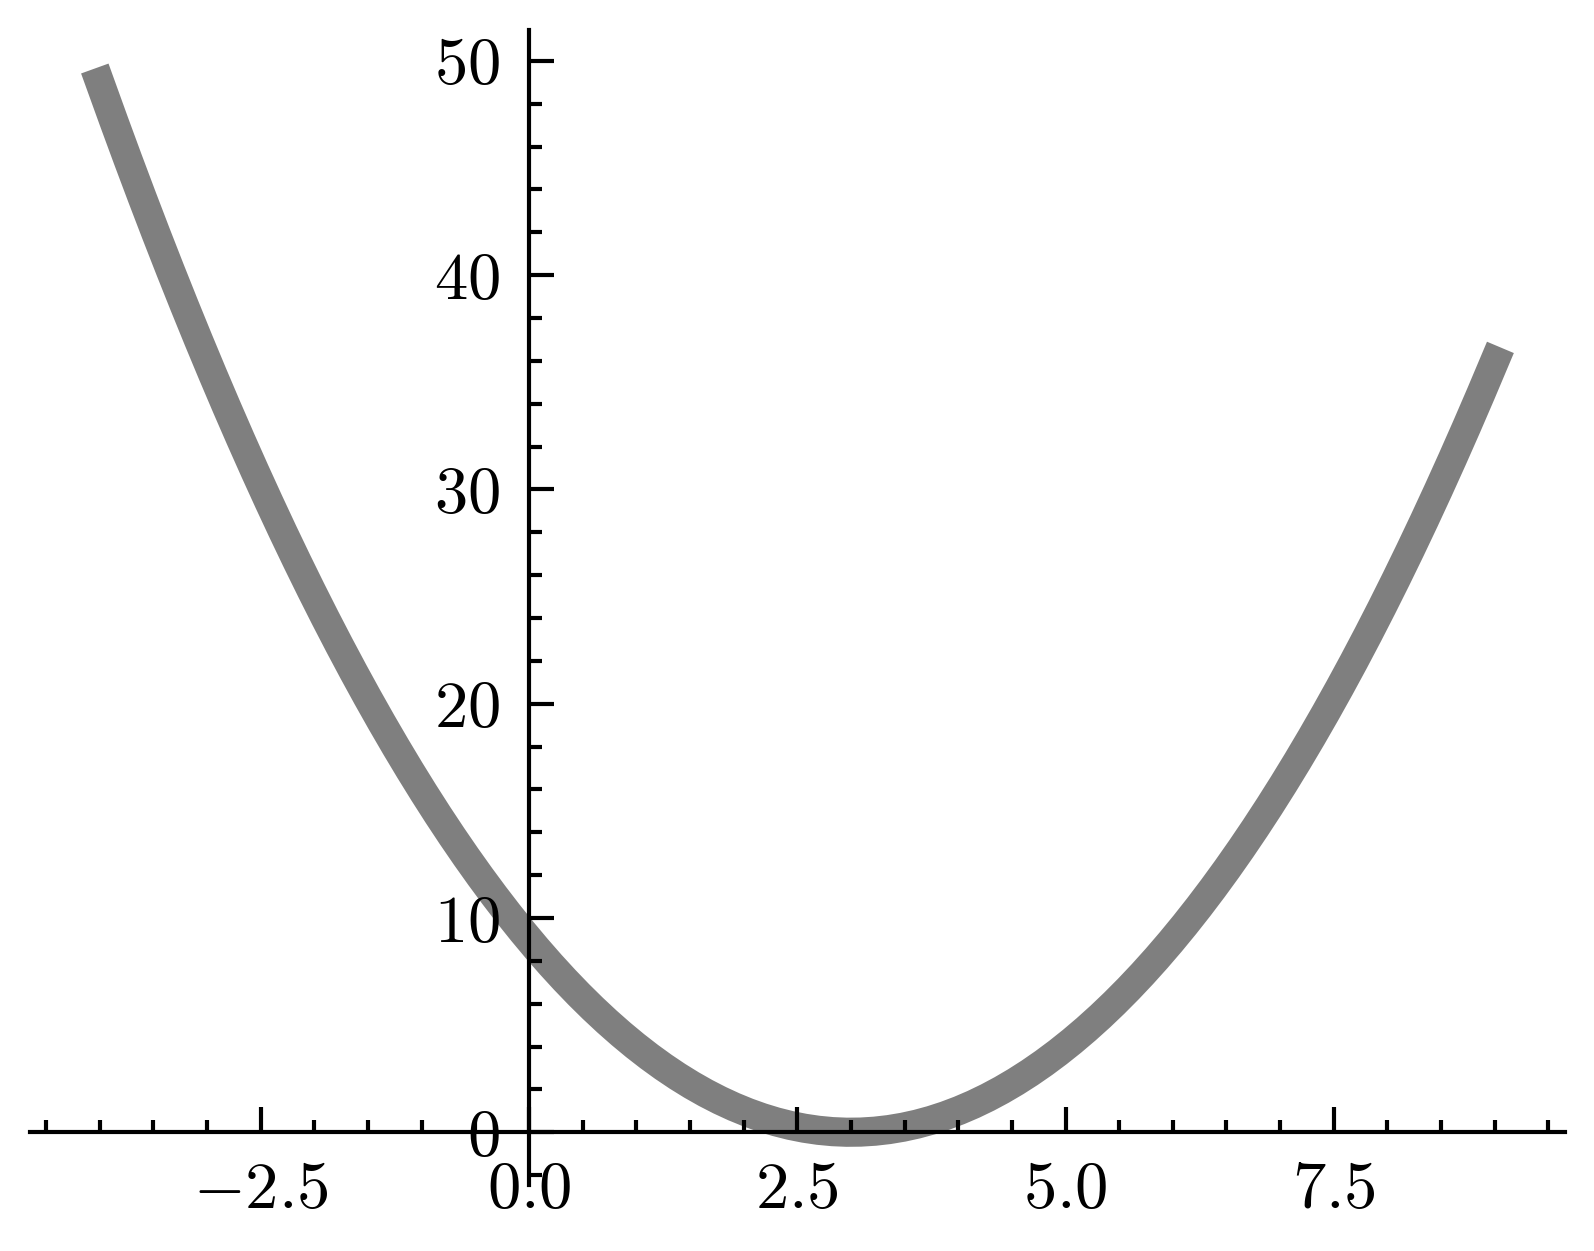

In [2]:
def f(x):
    return (x-3)**2
def f_prime(x):
    return 2*(x-3)

x = np.linspace(-4, 9, 100)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, '-', alpha = 0.5, linewidth = 3.5)

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

In [3]:
x_old = -4
eta = 0.76
current_x_list = [x_old]
current_y_list =[f(x_old)]
f_prime_list = [np.nan]
n_iterations = 20
for i in range(n_iterations):
    x_new = x_old - eta*f_prime(x_old)

    current_x_list.append(x_new)
    f_prime_list.append(f_prime(x_old))
    current_y_list.append(f(x_new))

    x_old = x_new
df = pd.DataFrame({'fprime': f_prime_list, 
                   'eta*fprime': [eta*prime for prime in f_prime_list], 
                   'Current x': current_x_list, 
                   'Current f(x)': current_y_list }).round(4)
print(df.head(7))
print(df.tail(7))

    fprime  eta*fprime  Current x  Current f(x)
0      NaN         NaN    -4.0000       49.0000
1 -14.0000    -10.6400     6.6400       13.2496
2   7.2800      5.5328     1.1072        3.5827
3  -3.7856     -2.8771     3.9843        0.9688
4   1.9685      1.4961     2.4882        0.2620
5  -1.0236     -0.7780     3.2661        0.0708
6   0.5323      0.4045     2.8616        0.0192
    fprime  eta*fprime  Current x  Current f(x)
14  0.0028      0.0022     2.9993           0.0
15 -0.0015     -0.0011     3.0004           0.0
16  0.0008      0.0006     2.9998           0.0
17 -0.0004     -0.0003     3.0001           0.0
18  0.0002      0.0002     2.9999           0.0
19 -0.0001     -0.0001     3.0000           0.0
20  0.0001      0.0000     3.0000           0.0


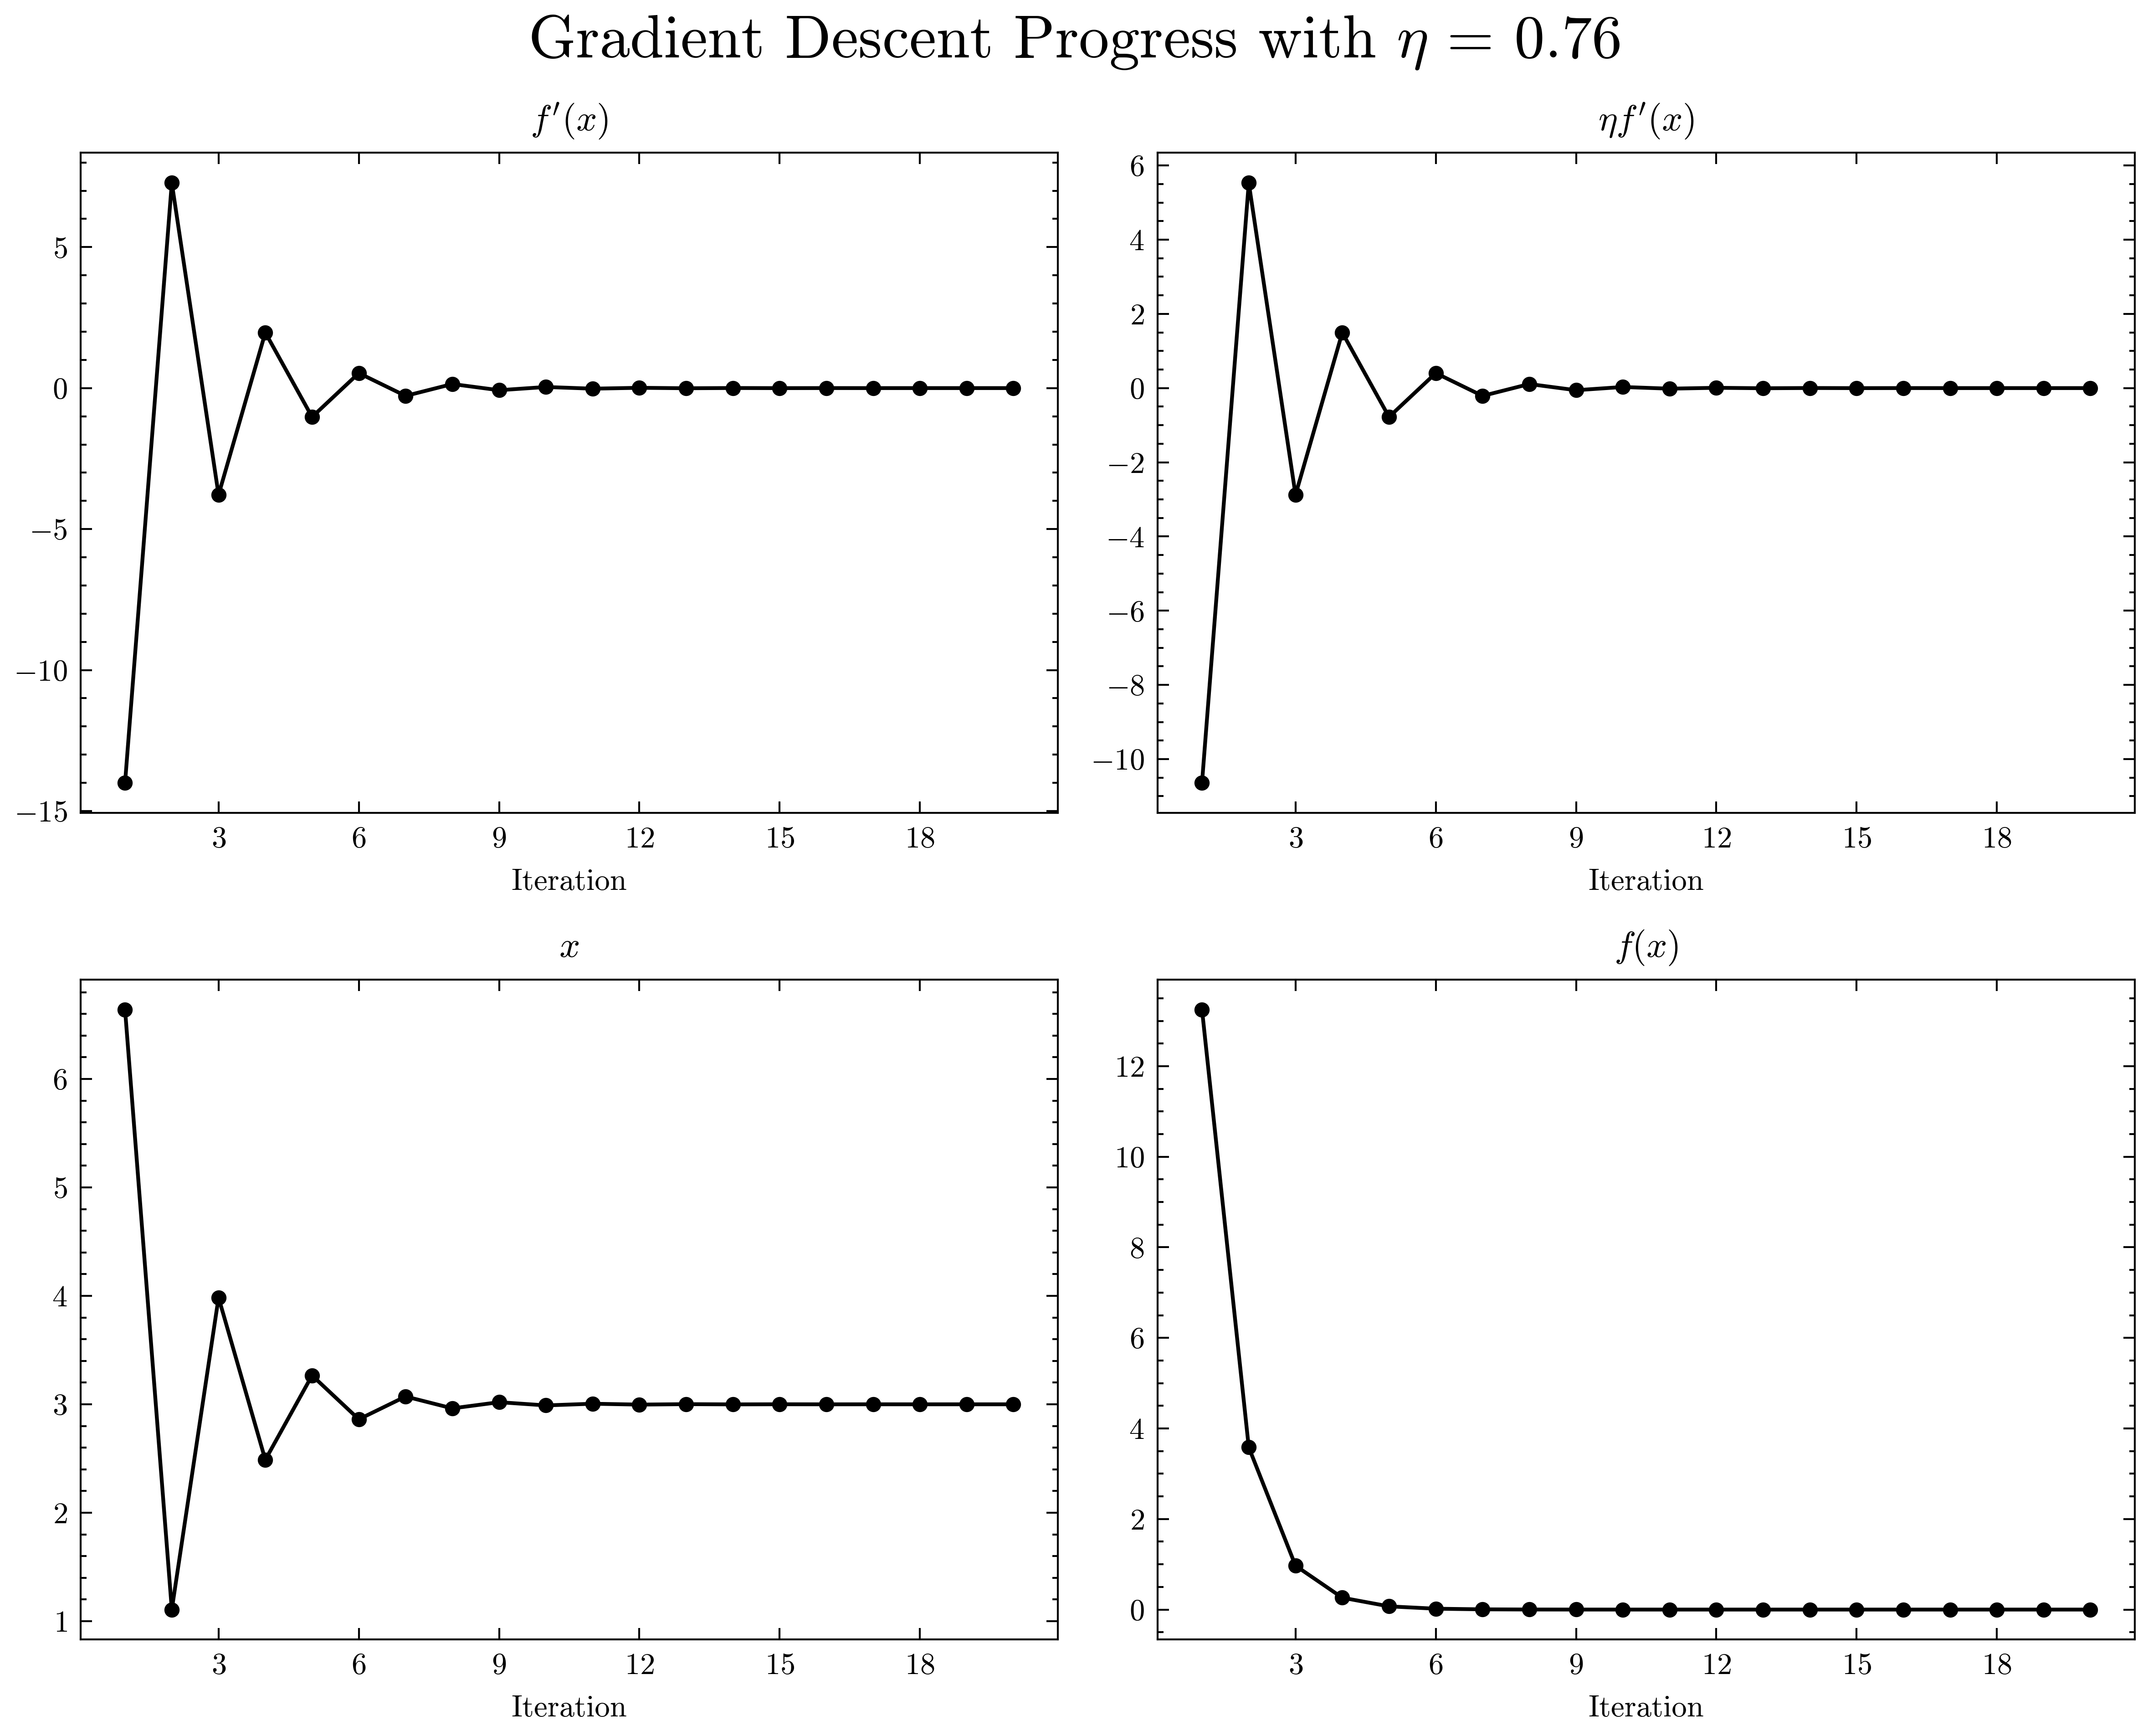

In [4]:
n_x_ticks = 8
fig, axs = plt.subplots(2, 2, figsize=(8, 6.5))
fig.suptitle(f'Gradient Descent Progress with $\\eta$ = {eta}', fontsize=16)  

axs[0, 0].plot(df.loc[1:, 'fprime'], '.-')
axs[0, 0].set_title('$f\'(x)$')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[0, 0].xaxis.set_minor_locator(mticker.NullLocator())

axs[0, 1].plot(df.loc[1:, 'eta*fprime'], '.-')
axs[0, 1].set_title('$\\eta f\'(x)$')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[0, 1].xaxis.set_minor_locator(mticker.NullLocator())

axs[1, 0].plot(df.loc[1:, 'Current x'], '.-')
axs[1, 0].set_title('$x$')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[1, 0].xaxis.set_minor_locator(mticker.NullLocator())

axs[1, 1].plot(df.loc[1:, 'Current f(x)'], '.-')
axs[1, 1].set_title('$f(x)$')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[1, 1].xaxis.set_minor_locator(mticker.NullLocator())

plt.tight_layout()
plt.show()

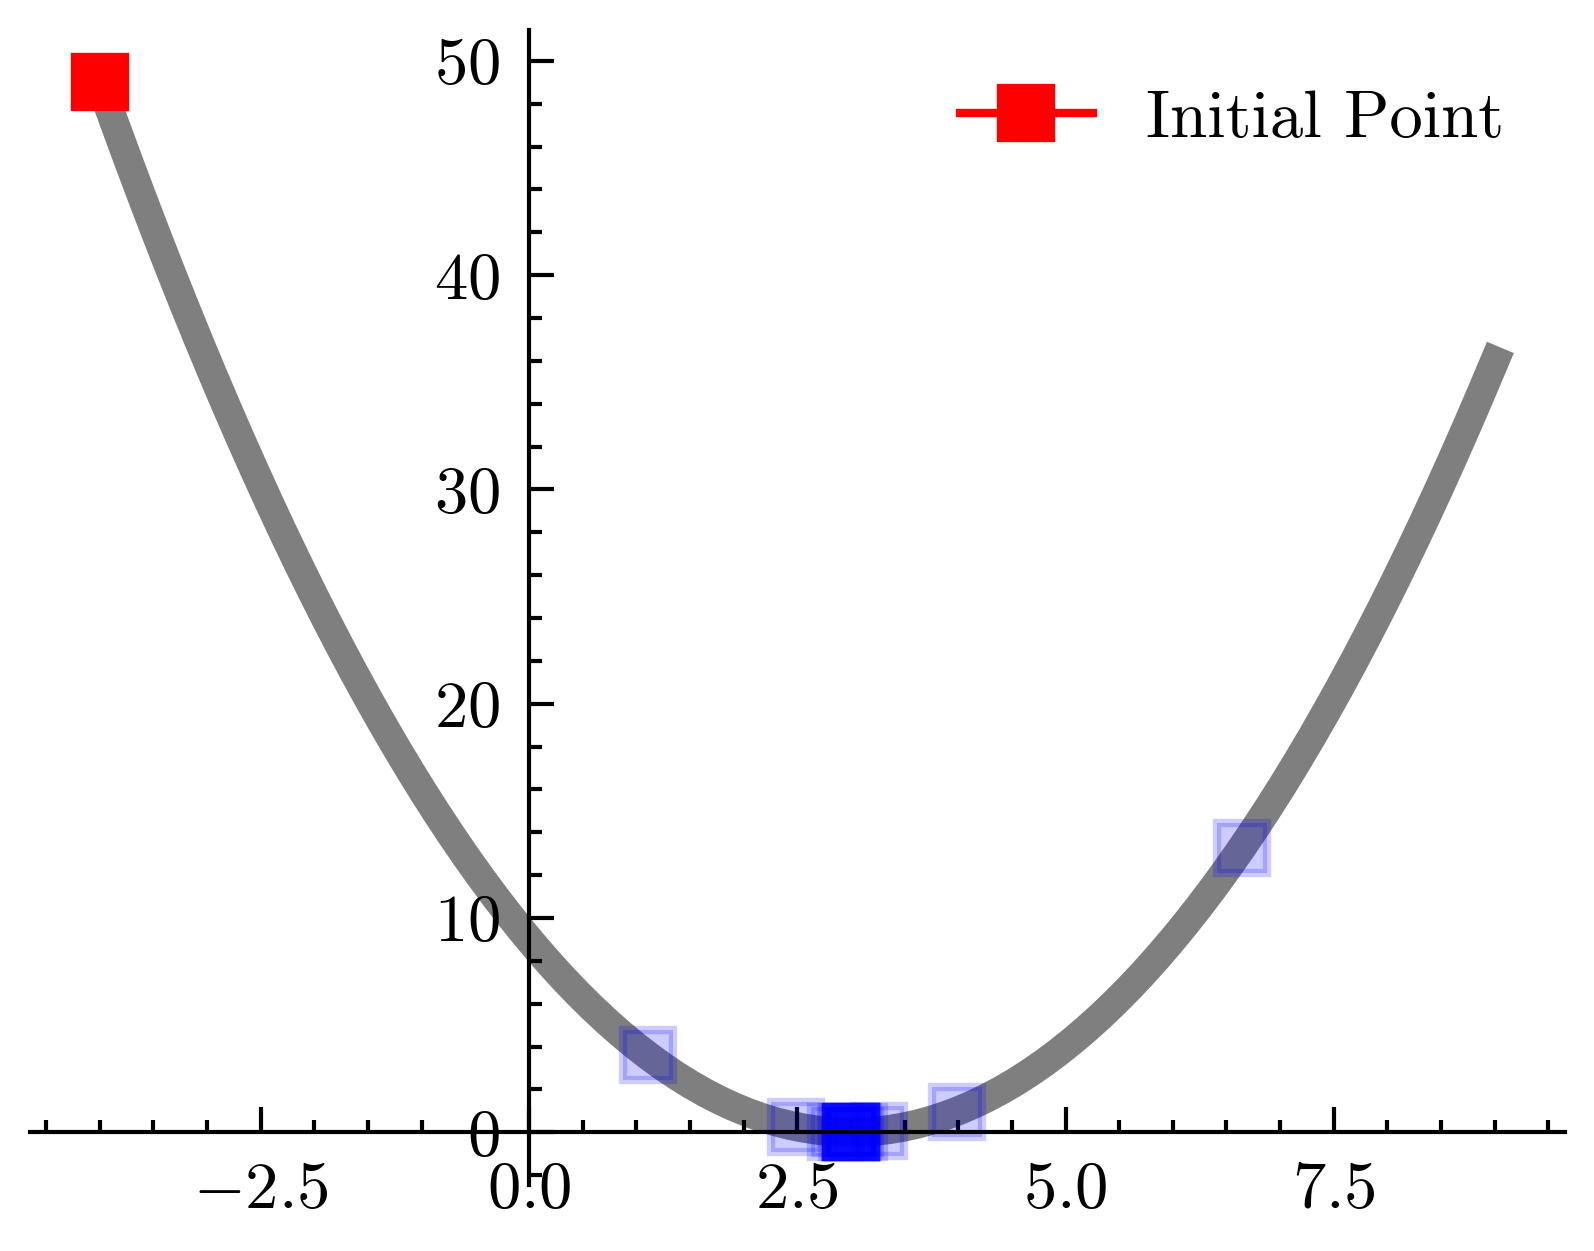

In [5]:
fig, ax = plt.subplots()
ax.plot(x, y, '-', alpha = 0.5, linewidth = 3.5)
ax.plot(df['Current x'][0], df['Current f(x)'][0], 's-', color='red', label ='Initial Point')
for i in range(1, n_iterations):
    ax.plot(df['Current x'][i], df['Current f(x)'][i], 's-', color='blue', alpha = 0.2)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend()
plt.show()

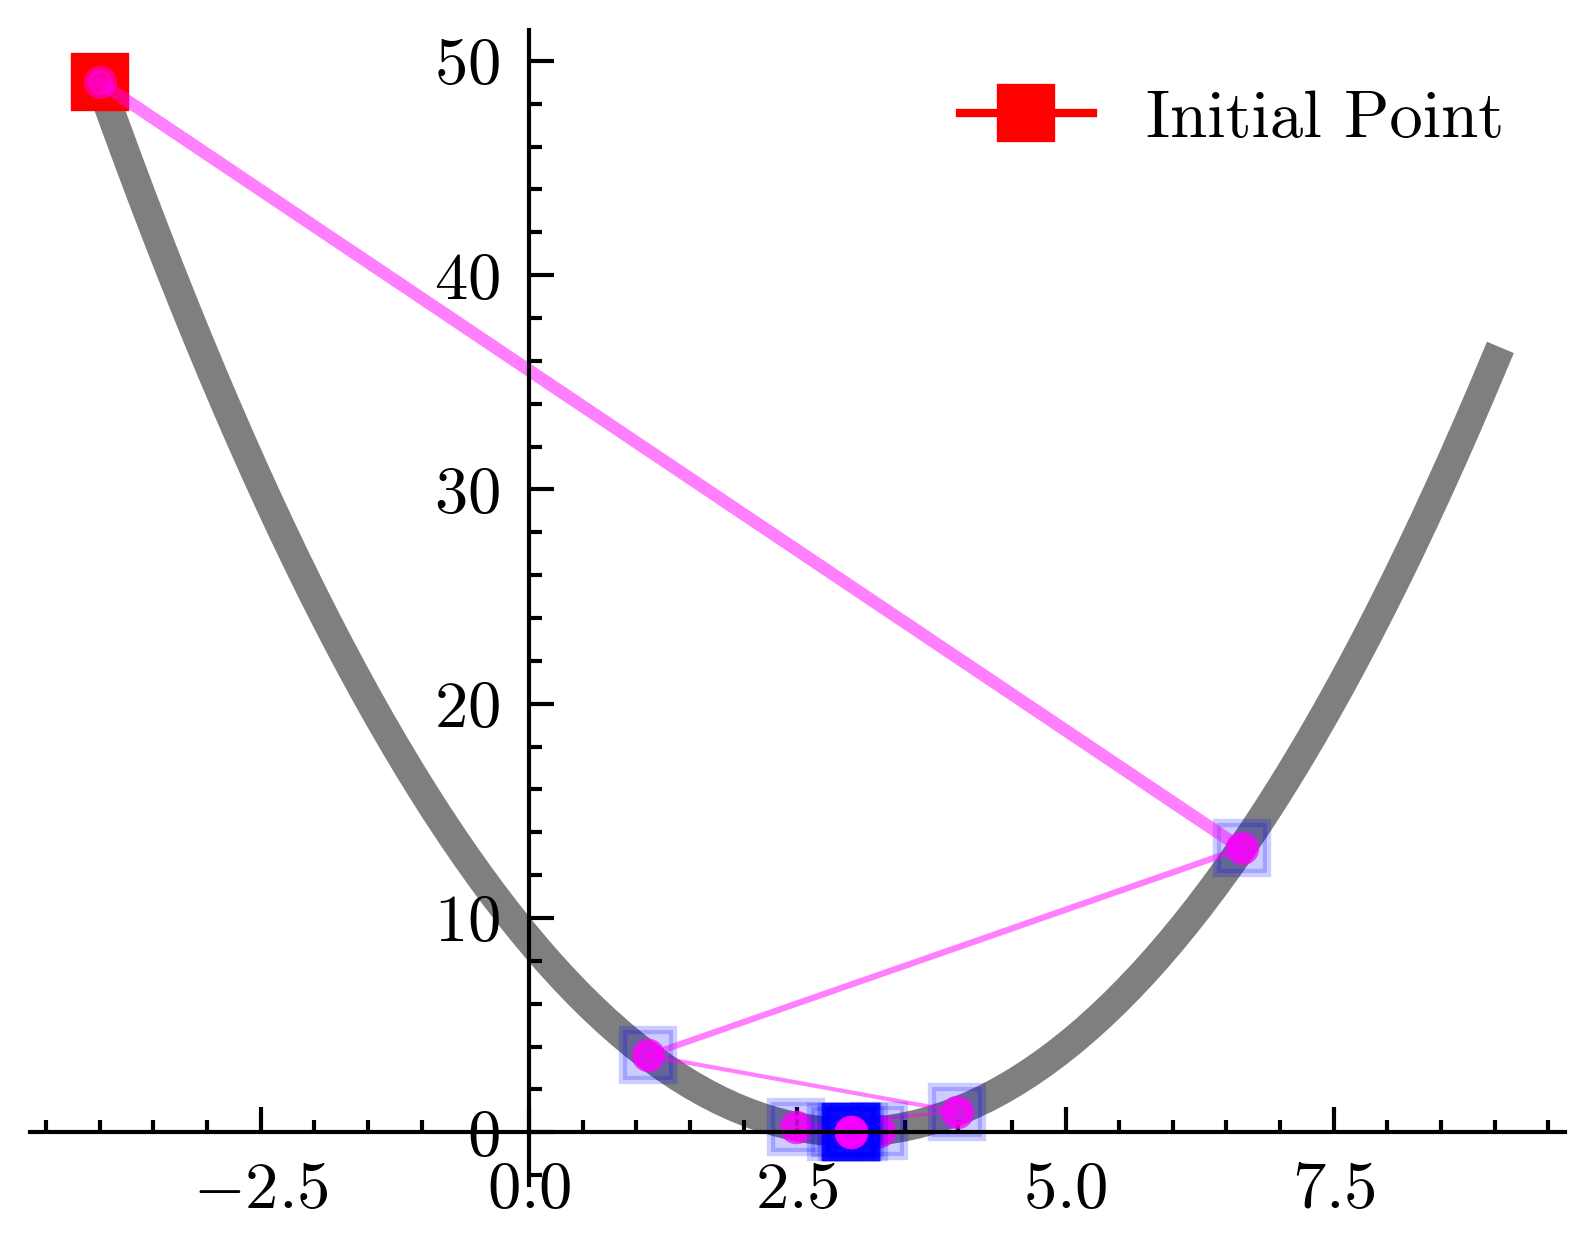

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, '-', alpha = 0.5, linewidth = 3.5)
ax.plot(df['Current x'][0], df['Current f(x)'][0], 's-', color='red', label ='Initial Point')
for i in range(1, n_iterations):
    ax.plot(df['Current x'][i], 
            df['Current f(x)'][i], 
            's-', color='blue', alpha = 0.2)
    ax.plot([df['Current x'][i-1],  df['Current x'][i]],
            [df['Current f(x)'][i-1],  df['Current f(x)'][i]] , 
            '.-',color='magenta', alpha=0.5, linewidth=(2/i)*0.75)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.legend()
plt.show()

<div class="alert-info">
<font color='black'>
<h1 align="center">
2. Multi Variable

The function $f(x,y)$ is defined as:

$f(x,y) = (x-3)^2 + (y+2)^2$

Its partial derivatives are

$f_x(x,y) = 2(x-3)$

$f_y(x,y) = 2(y+2)$


In [7]:

def f_multi(x, y):
    return (x-3)**2 + (y+2)**2

def f_multi_prime(x, y):
    return np.array([2*(x-3), 2*(y+2)])

In [8]:
x=np.linspace(-18, 18, 100)
y=np.linspace(-18, 18, 100)
x, y=np.meshgrid(x, y)
z= f_multi(x, y)
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z, colorscale='viridis')])

fig.update_layout(title='3D Plot', autosize=False,
                  width=700, height=900,
                  margin=dict(l=100, r=100, b=105, t=100))

fig.show()


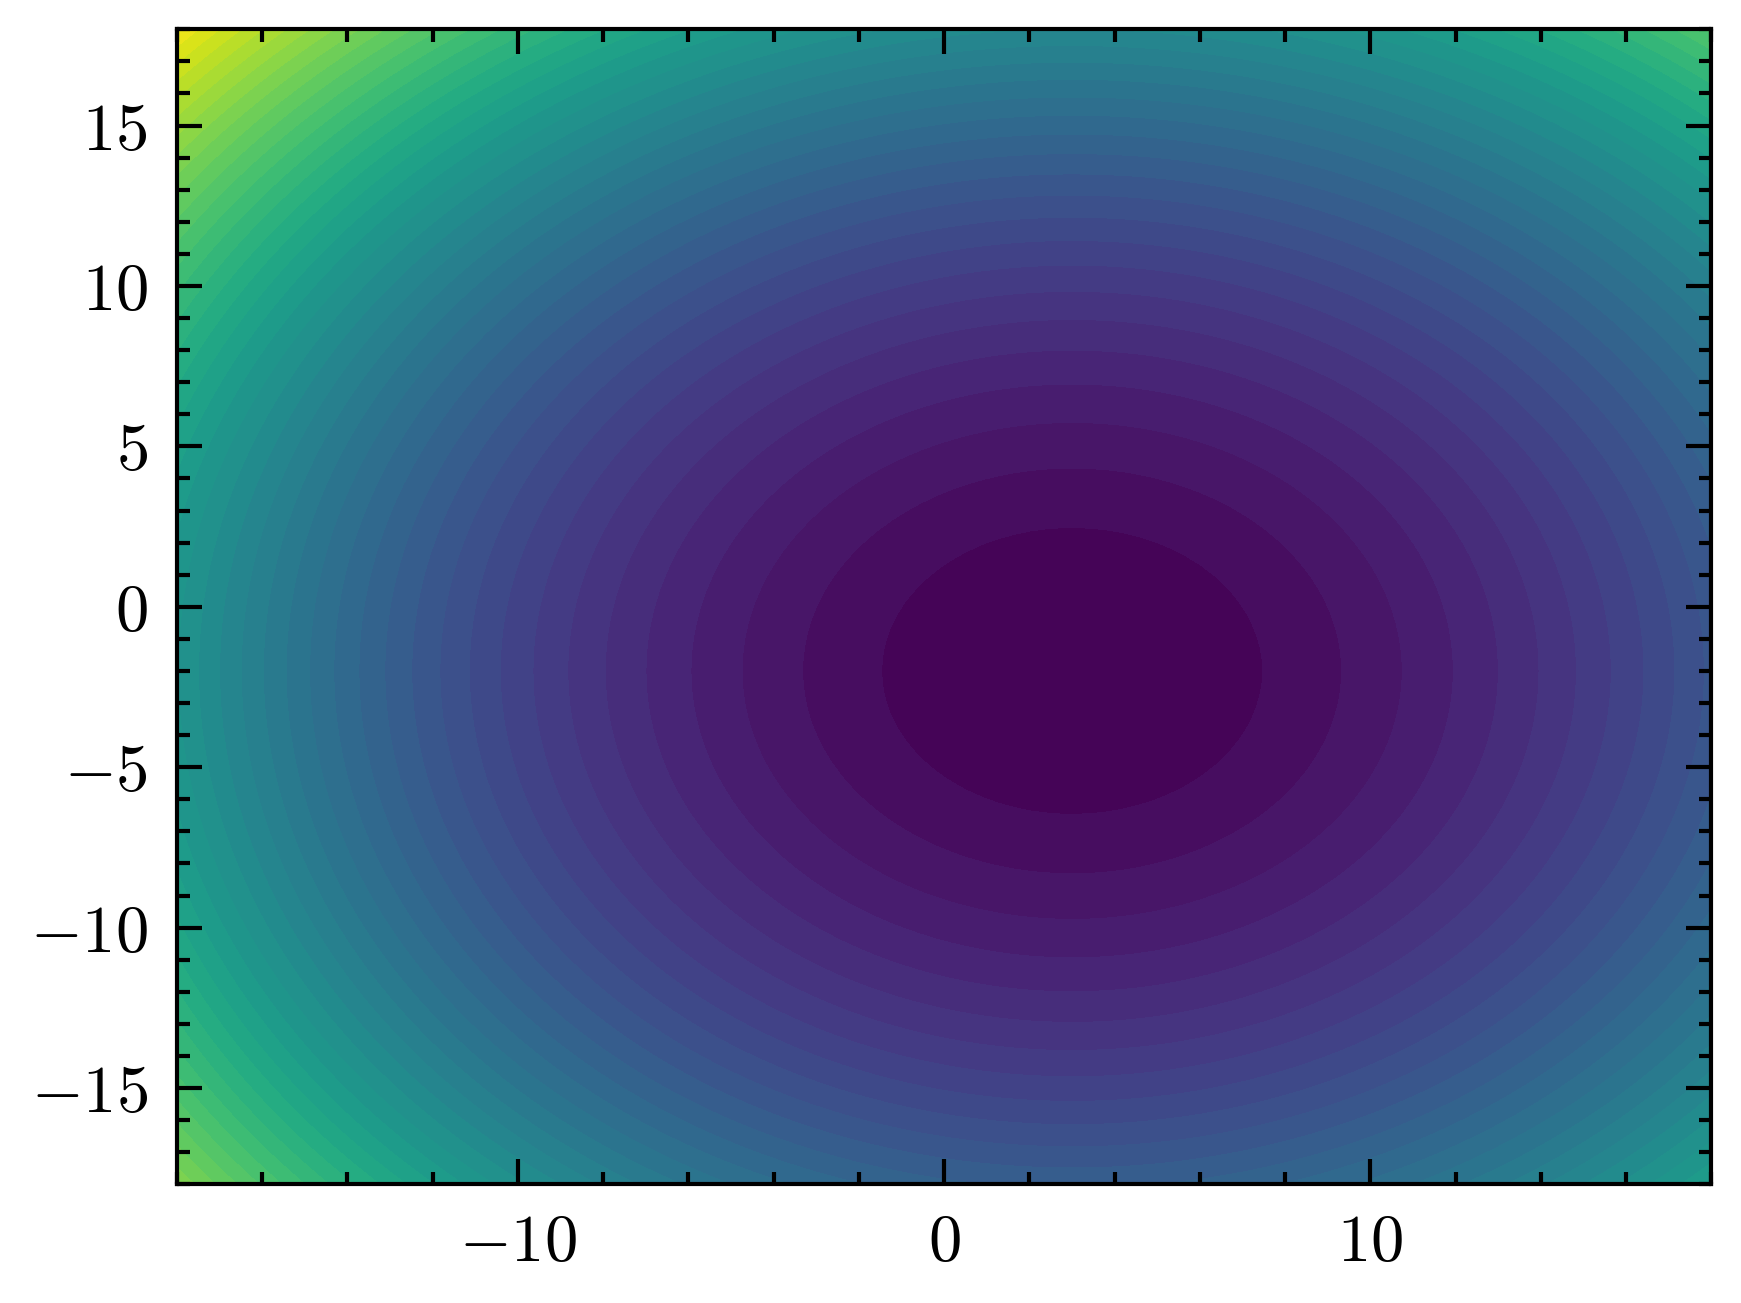

In [9]:
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.show()

In [10]:
x_now = -10
y_now = 7

vect_grad= (f_multi_prime(x_now,y_now)/np.linalg.norm(f_multi_prime(x_now, y_now)))
vect_grad

array([-0.82219219,  0.56920998])

In [11]:
np.sum(vect_grad**2)

1.0

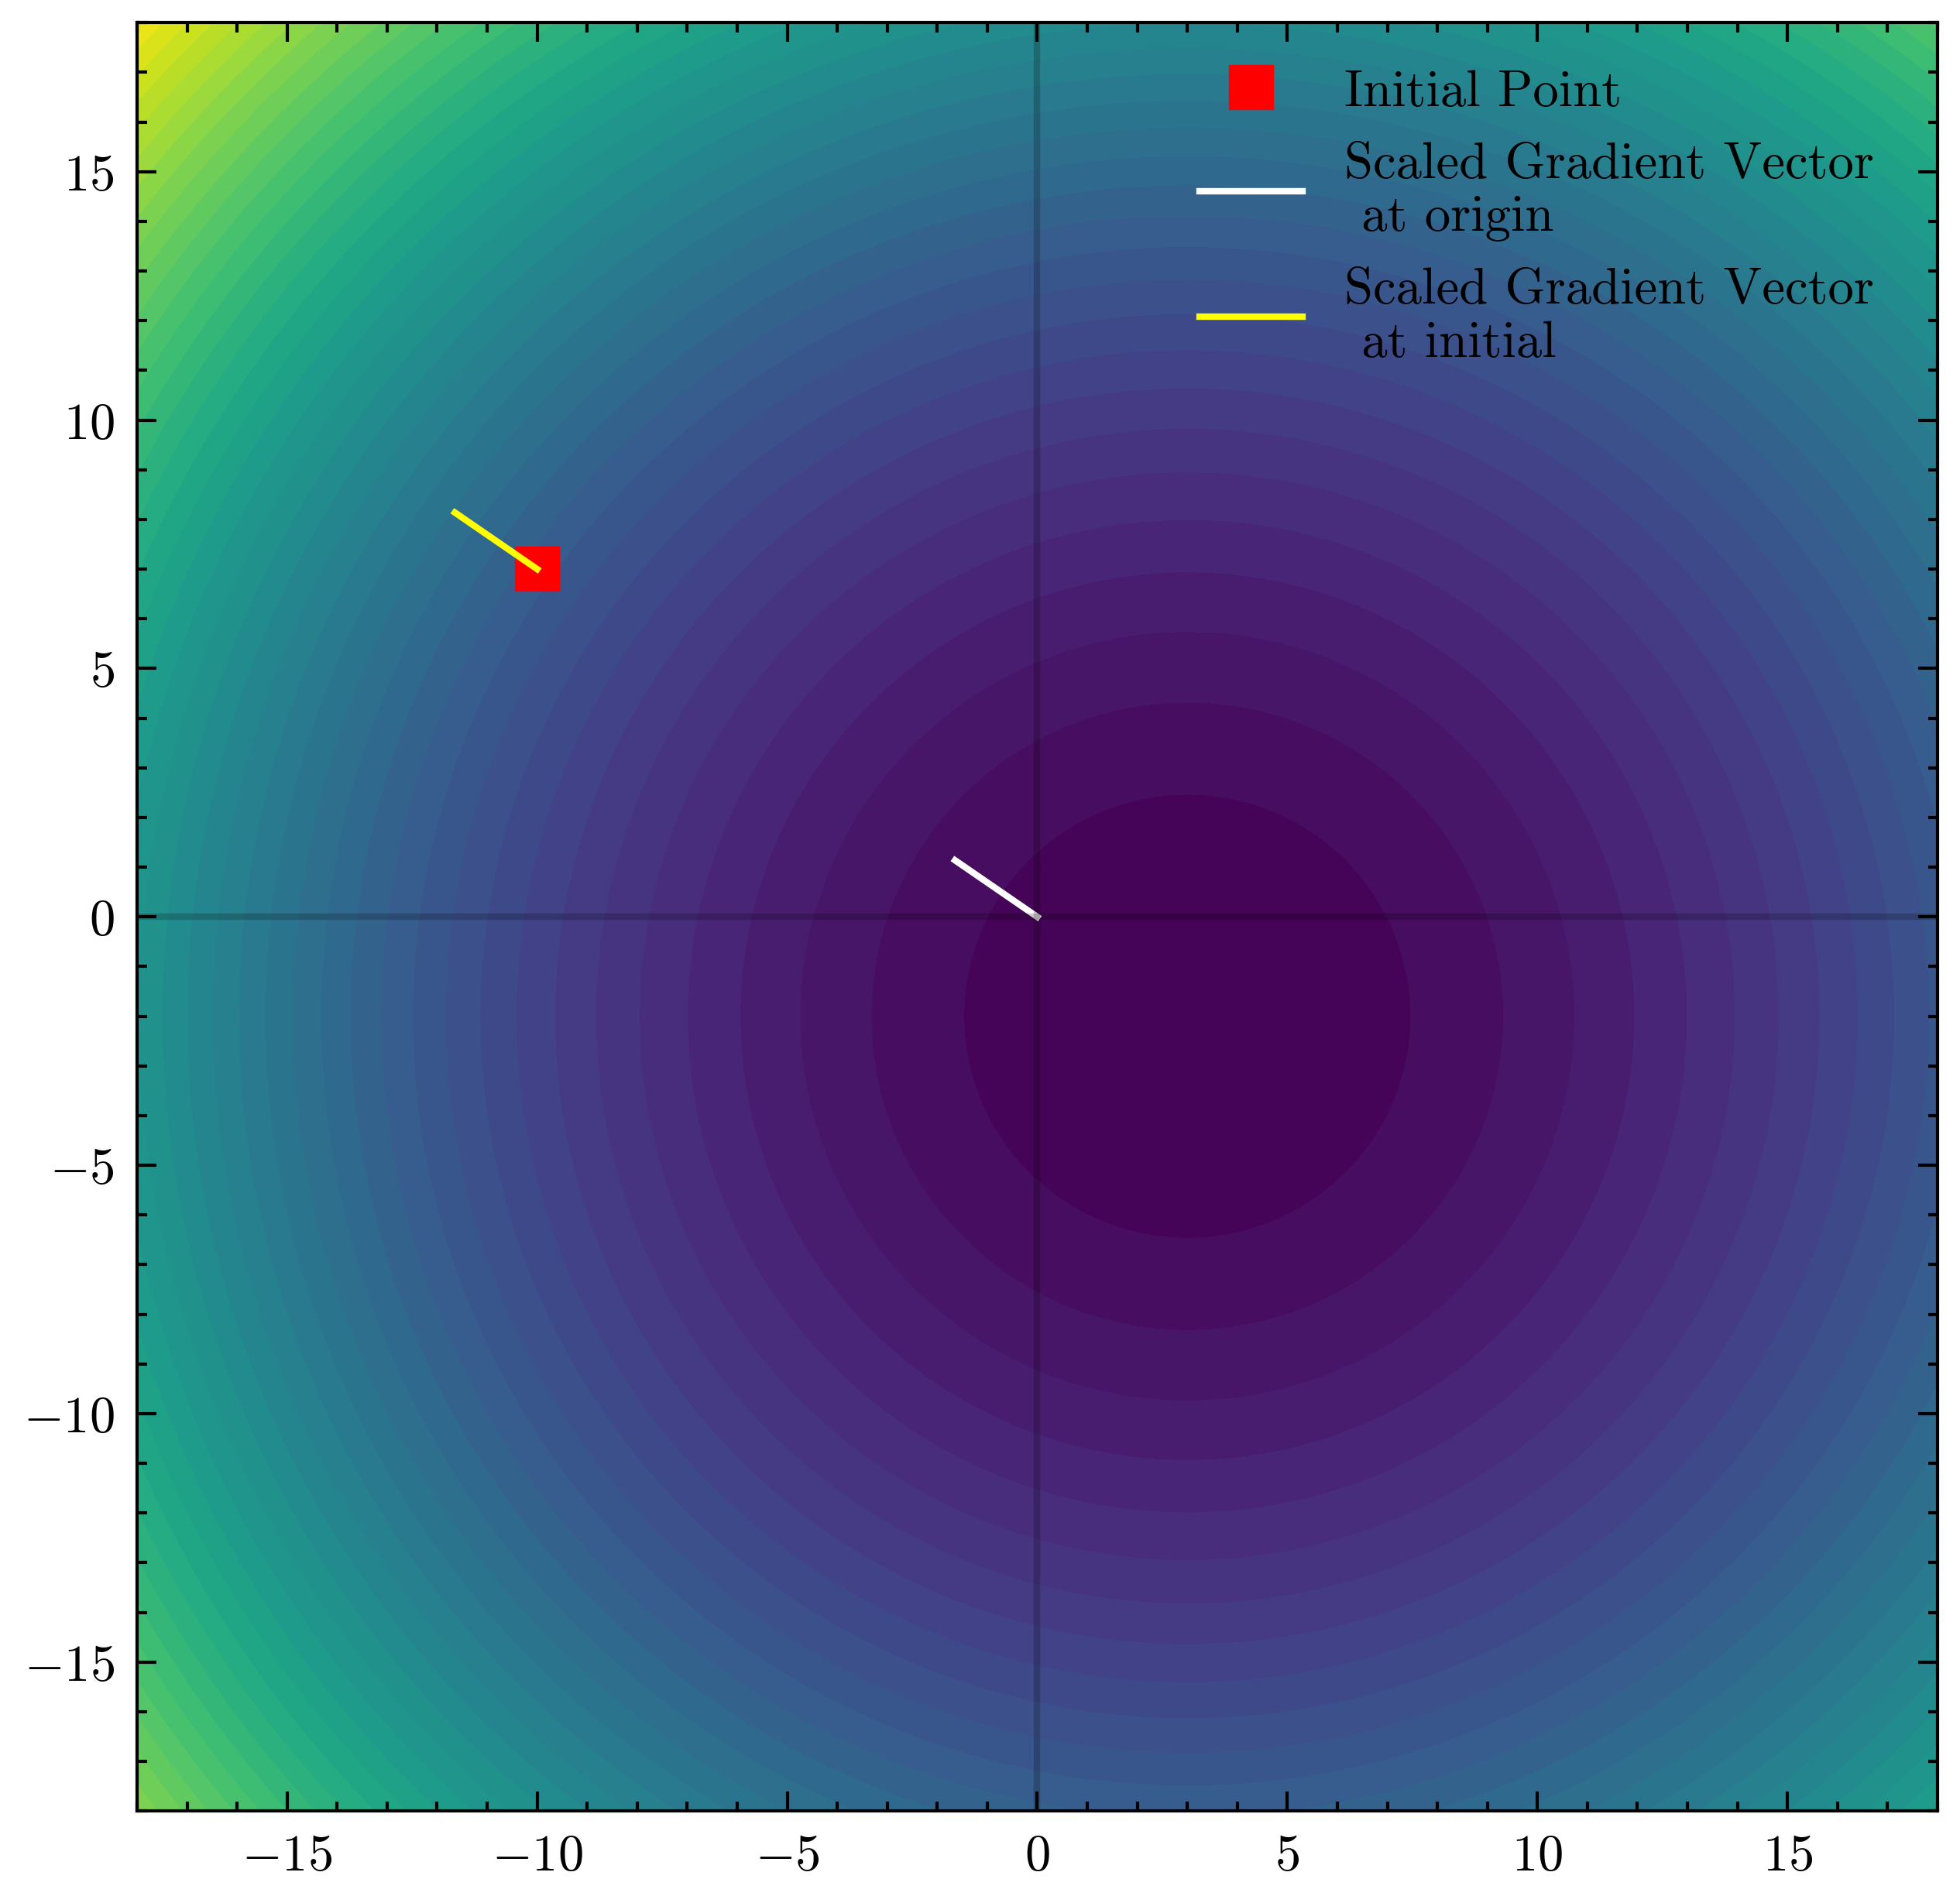

In [12]:
plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.plot(x_now, y_now, 's', color='red', label ='Initial Point')
plt.plot([0,  vect_grad[0]*2], [0, vect_grad[1]*2], '-', label='Scaled Gradient Vector \n at origin', color='white')
plt.plot([0+x_now,  vect_grad[0]*2 +x_now ], [0 + y_now, vect_grad[1]*2 + y_now ], '-', label='Scaled Gradient Vector \n at initial', color='yellow')

plt.axvline(0, alpha =0.2)
plt.axhline(0, alpha =(0.2))

plt.legend()
plt.show()

In [13]:
step = 3
x_next_step = x_now - step*vect_grad[0]
y_next_step = y_now - step*vect_grad[1]
dif = f_multi(x_now,y_now) - f_multi(x_next_step,y_next_step)  
print(f'Z now: {f_multi(x_now,y_now)}')
print(f'Z next: {f_multi(x_next_step,y_next_step)}')
print(f'Z now - Z next: {dif}')

Z now: 250
Z next: 164.1316701949486
Z now - Z next: 85.86832980505139


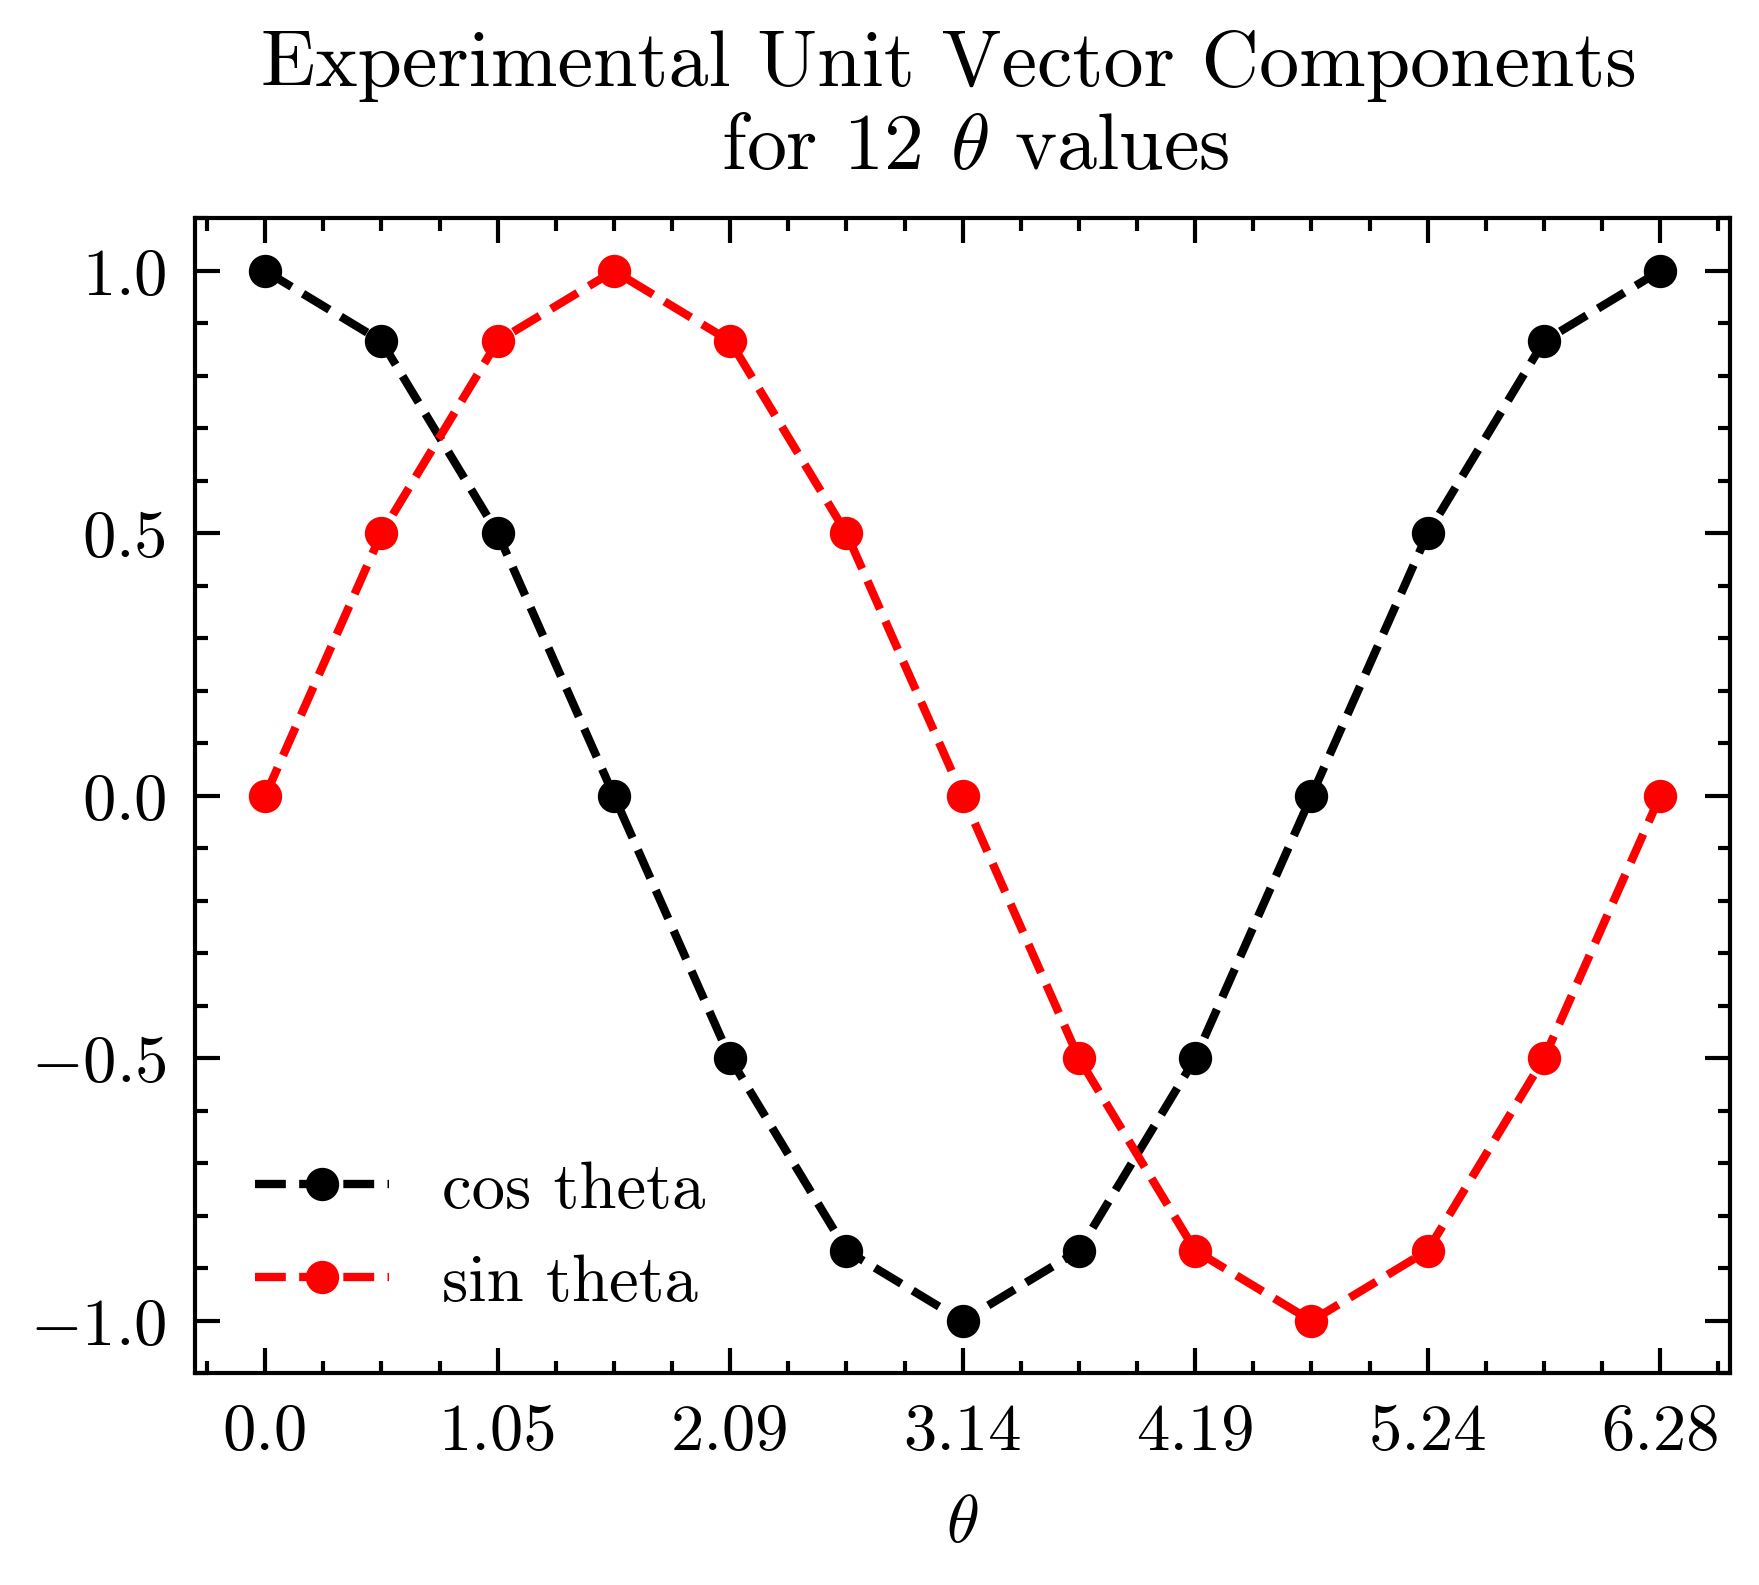

In [14]:
n_theta = 12
theta = np.linspace(0, 2*np.pi, n_theta+1)
vect_u =np.array([np.cos(theta), np.sin(theta)])
plt.plot(vect_u[0],'.--', color= 'black', label = 'cos theta')
plt.plot(vect_u[1], '.--', color= 'red', label = 'sin theta')
plt.xlabel('$\\theta$')
plt.xticks(list(range(n_theta+1)), list(theta.round(2)))
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(8))
plt.title(f'Experimental Unit Vector Components \n for {n_theta} $\\theta $ values')

plt.legend()
plt.show()

In [15]:
x_next_step_array = x_now-step*vect_u[0]
y_next_step_array = y_now-step*vect_u[1]
diff_array = f_multi(x_now, y_now) - f_multi(x_next_step_array,y_next_step_array) 
df_multi = pd.DataFrame(data = {
    'Theta': theta,
    'x_next_step': x_next_step_array,
    'y_next_step': y_next_step_array,
    'Difference': diff_array
})
print(df_multi)

       Theta  x_next_step  y_next_step  Difference
0   0.000000   -13.000000     7.000000  -87.000000
1   0.523599   -12.598076     5.500000  -49.549981
2   1.047198   -11.500000     4.401924   -1.234628
3   1.570796   -10.000000     4.000000   45.000000
4   2.094395    -8.500000     4.401924   76.765372
5   2.617994    -7.401924     5.500000   85.549981
6   3.141593    -7.000000     7.000000   69.000000
7   3.665191    -7.401924     8.500000   31.549981
8   4.188790    -8.500000     9.598076  -16.765372
9   4.712389   -10.000000    10.000000  -63.000000
10  5.235988   -11.500000     9.598076  -94.765372
11  5.759587   -12.598076     8.500000 -103.549981
12  6.283185   -13.000000     7.000000  -87.000000


In [16]:
max(diff_array)

85.54998149518622

In [17]:
loc_largest_change_vect = np.argmax(diff_array)
loc_largest_change_vect

5

In [18]:
vect_u[:,loc_largest_change_vect]

array([-0.8660254,  0.5      ])

In [19]:
vect_grad


array([-0.82219219,  0.56920998])

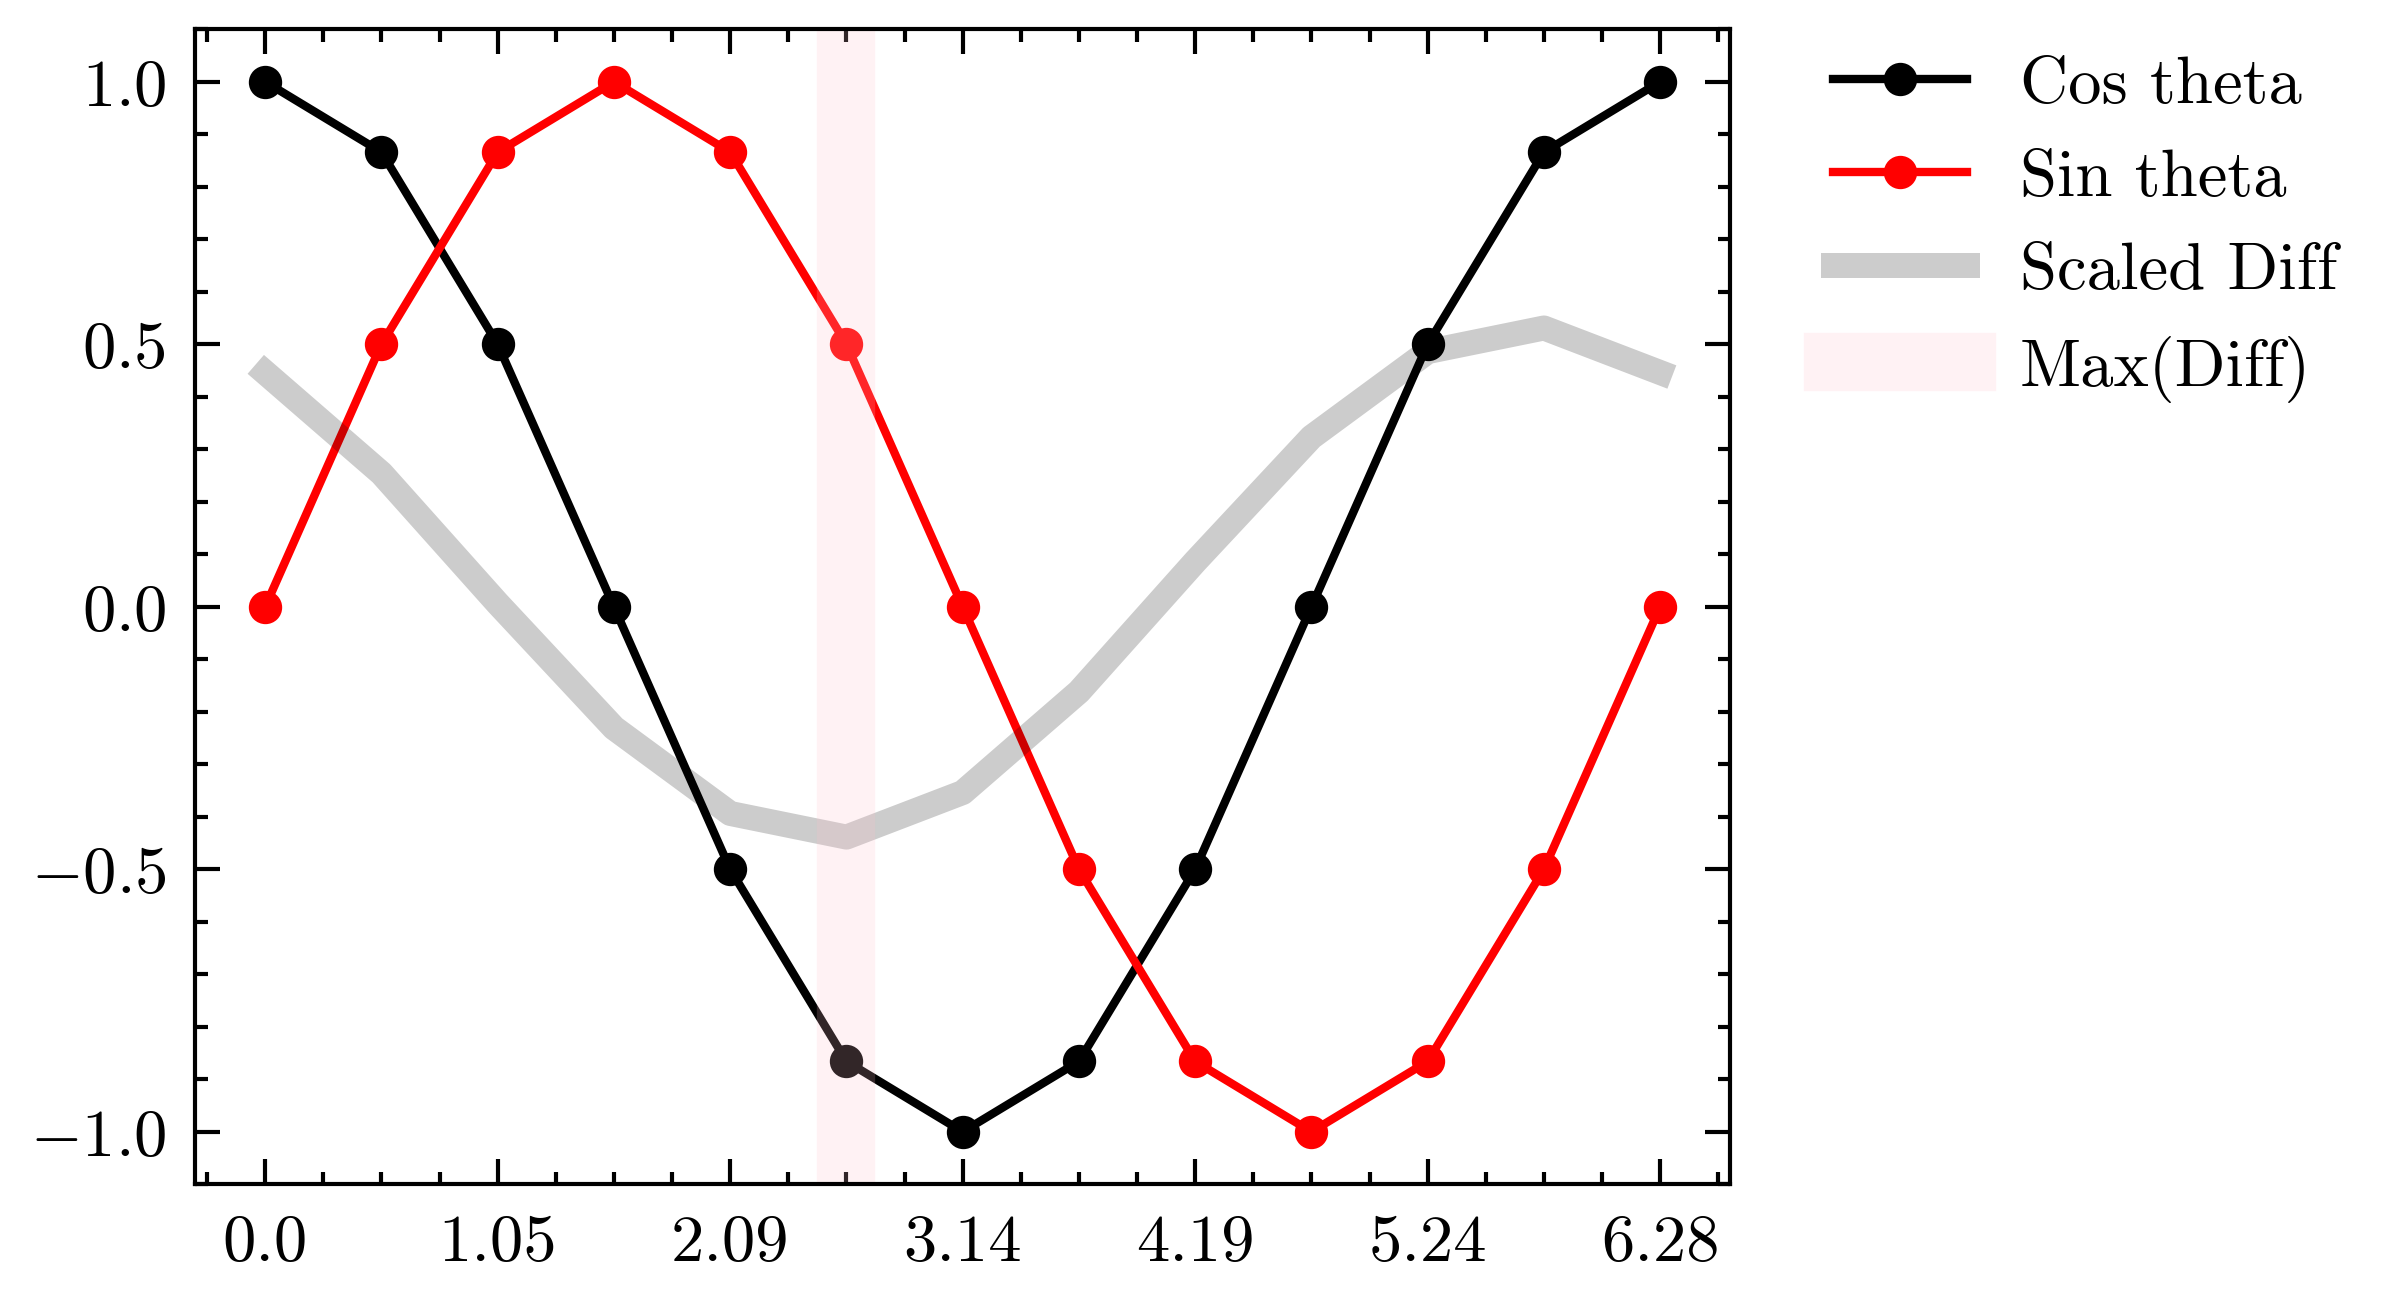

In [20]:
plt.plot(vect_u[0],'.-', color= 'black', label = 'Cos theta')
plt.plot(vect_u[1], '.-', color= 'red', label = 'Sin theta')
plt.plot(diff_array/sum(diff_array),label ='Scaled Diff', linewidth=3, alpha = 0.2)
plt.axvline(loc_largest_change_vect, color='pink',linewidth=7, alpha=0.2, label="Max(Diff)")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xticks(list(range(n_theta+1)), list(theta.round(2)))
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(8))


plt.show()

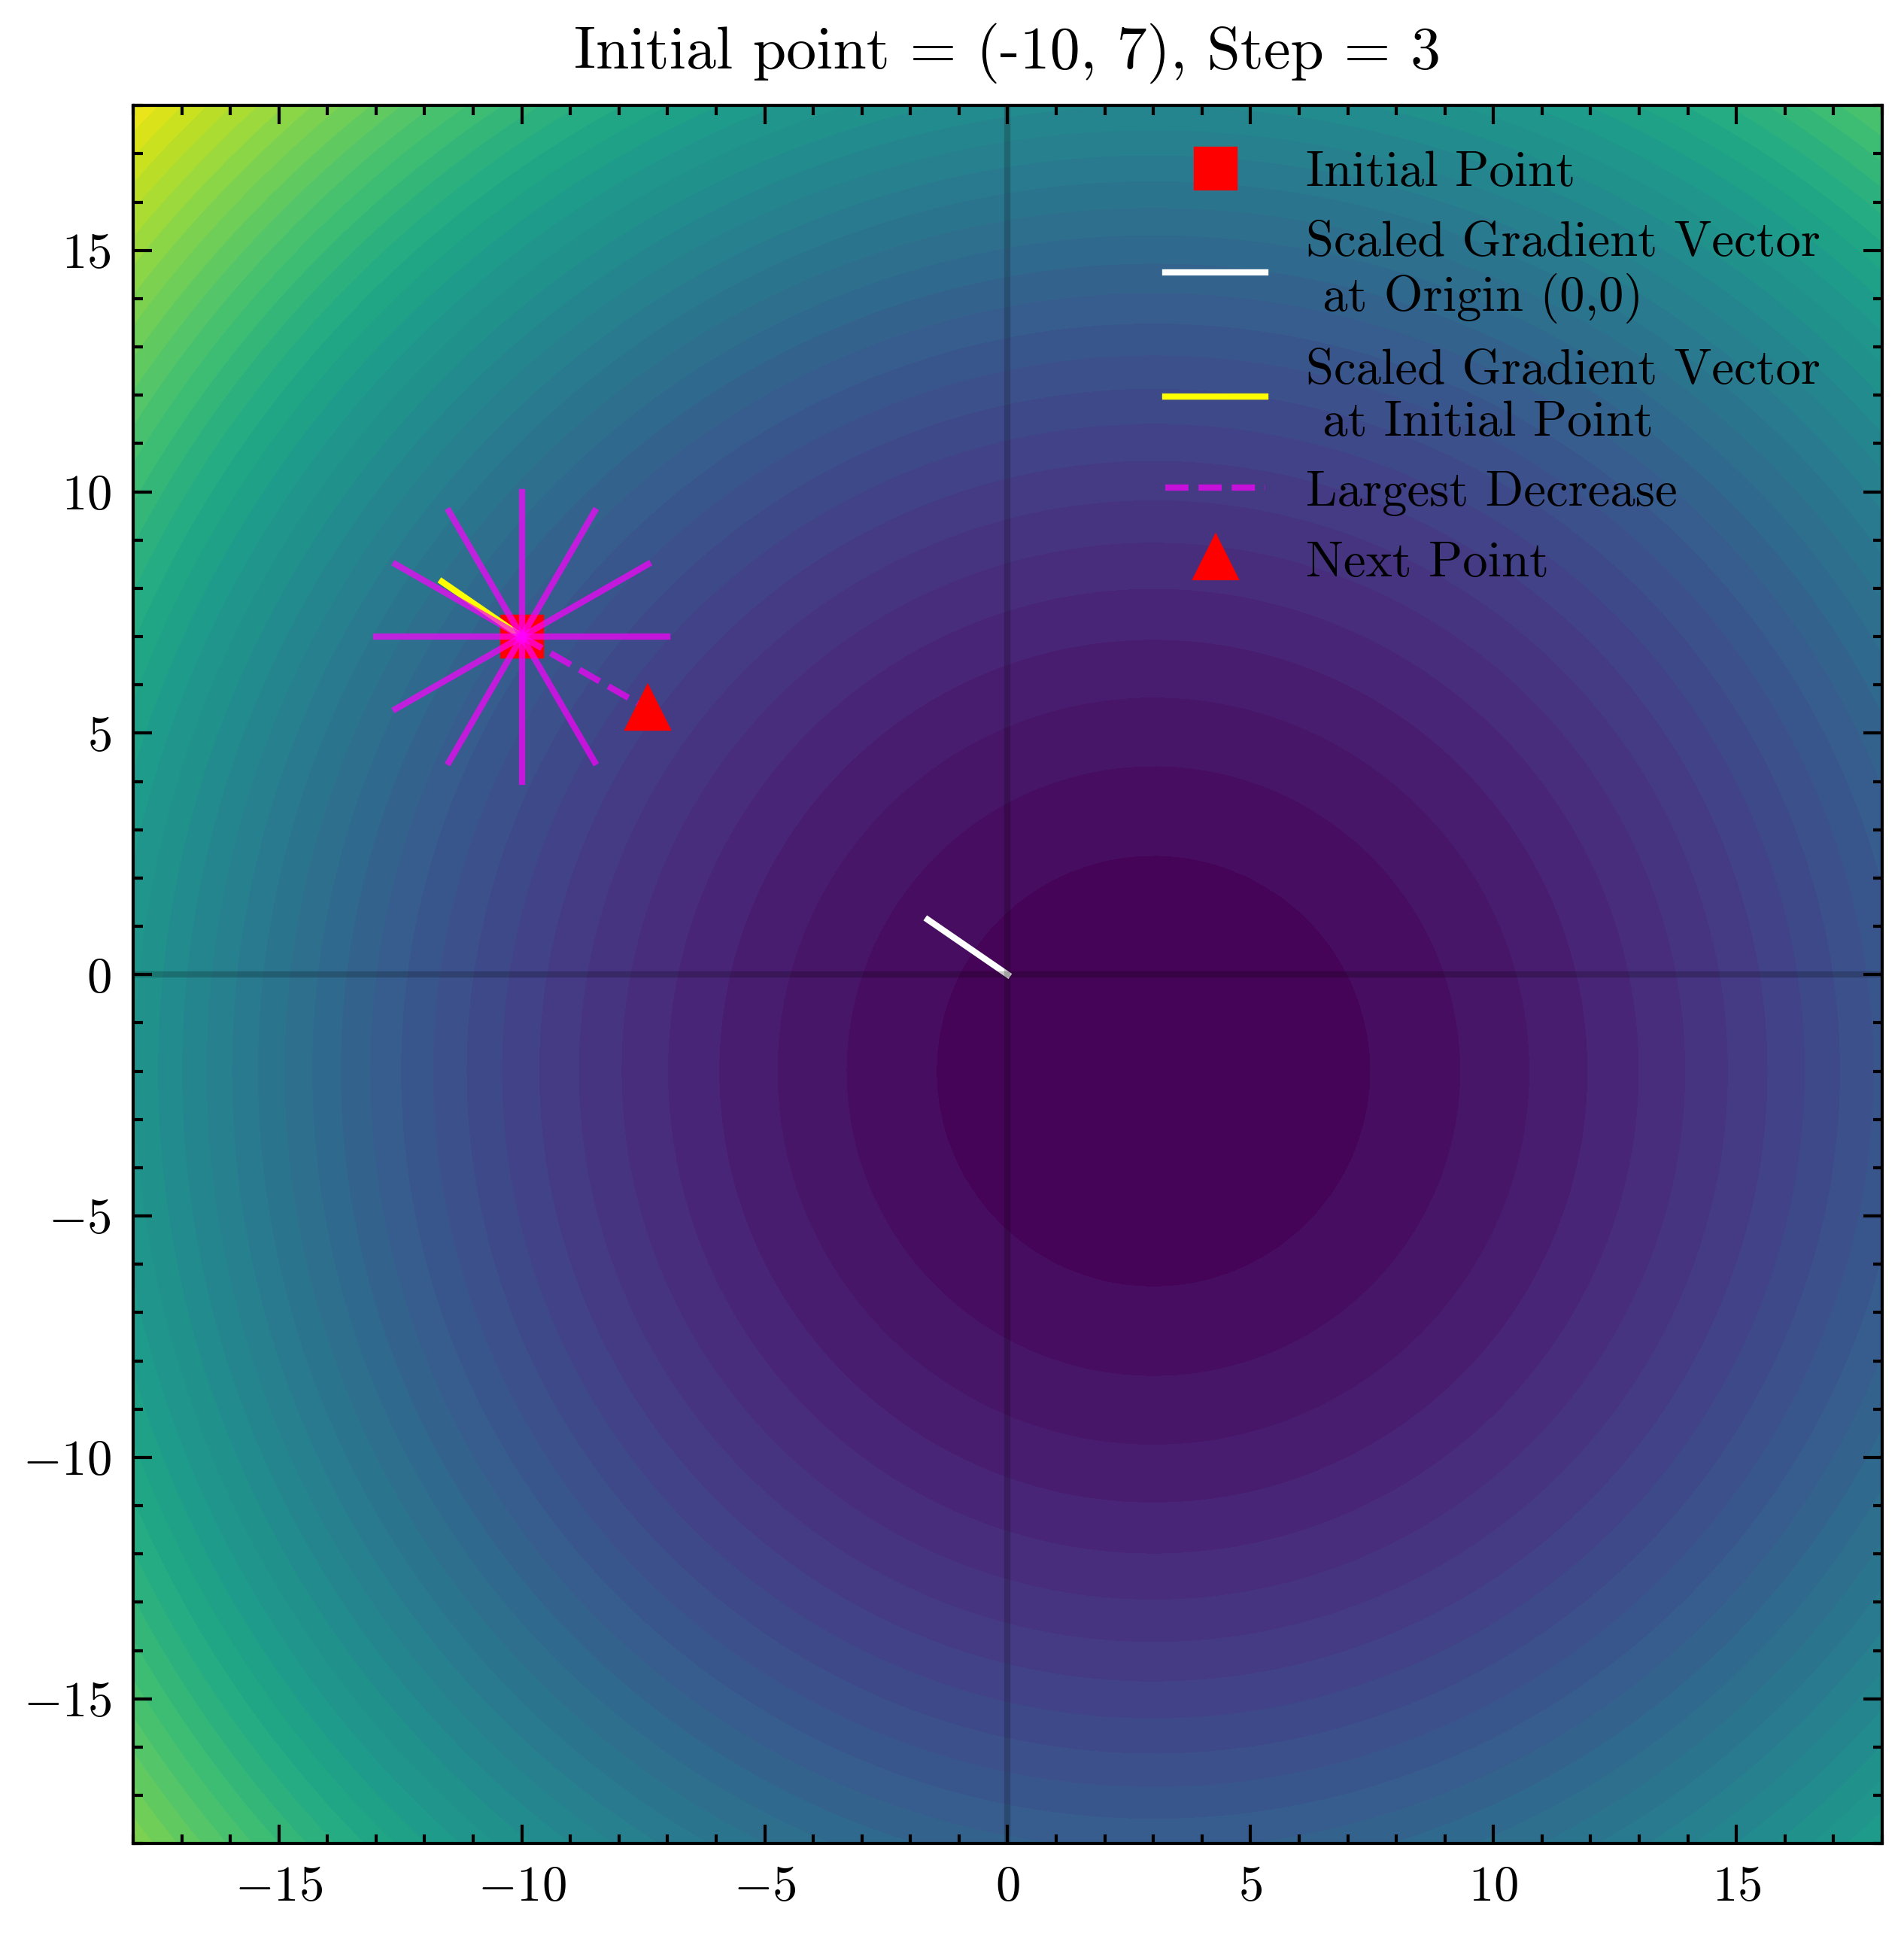

In [21]:
plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.plot(x_now, y_now, 's', color='red', label ='Initial Point')
plt.plot([0,  vect_grad[0]*2], [0, vect_grad[1]*2], '-', label='Scaled Gradient Vector \n at Origin (0,0)', color='white')
plt.plot([0+x_now,  vect_grad[0]*2 +x_now ], [0 + y_now, vect_grad[1]*2 + y_now ], '-', label='Scaled Gradient Vector \n at Initial Point', color='yellow')
for i in range(n_theta):
    if i == loc_largest_change_vect:
        plt.plot([x_now, x_now-step*vect_u[0,i]], [y_now, y_now-step*vect_u[1,i]], '--', alpha=0.7, color='magenta', label = 'Largest Decrease')
    else:
        plt.plot([x_now, x_now-step*vect_u[0,i]], [y_now, y_now-step*vect_u[1,i]], '-', alpha=0.7, color='magenta')

plt.plot(df_multi['x_next_step'][loc_largest_change_vect], df_multi['y_next_step'][loc_largest_change_vect], '^', color='red', label ='Next Point')
plt.axvline(0, alpha =0.2)
plt.axhline(0, alpha =(0.2))

plt.title(f'Initial point = {x_now, y_now}, Step = {step}')
plt.legend()
plt.show()

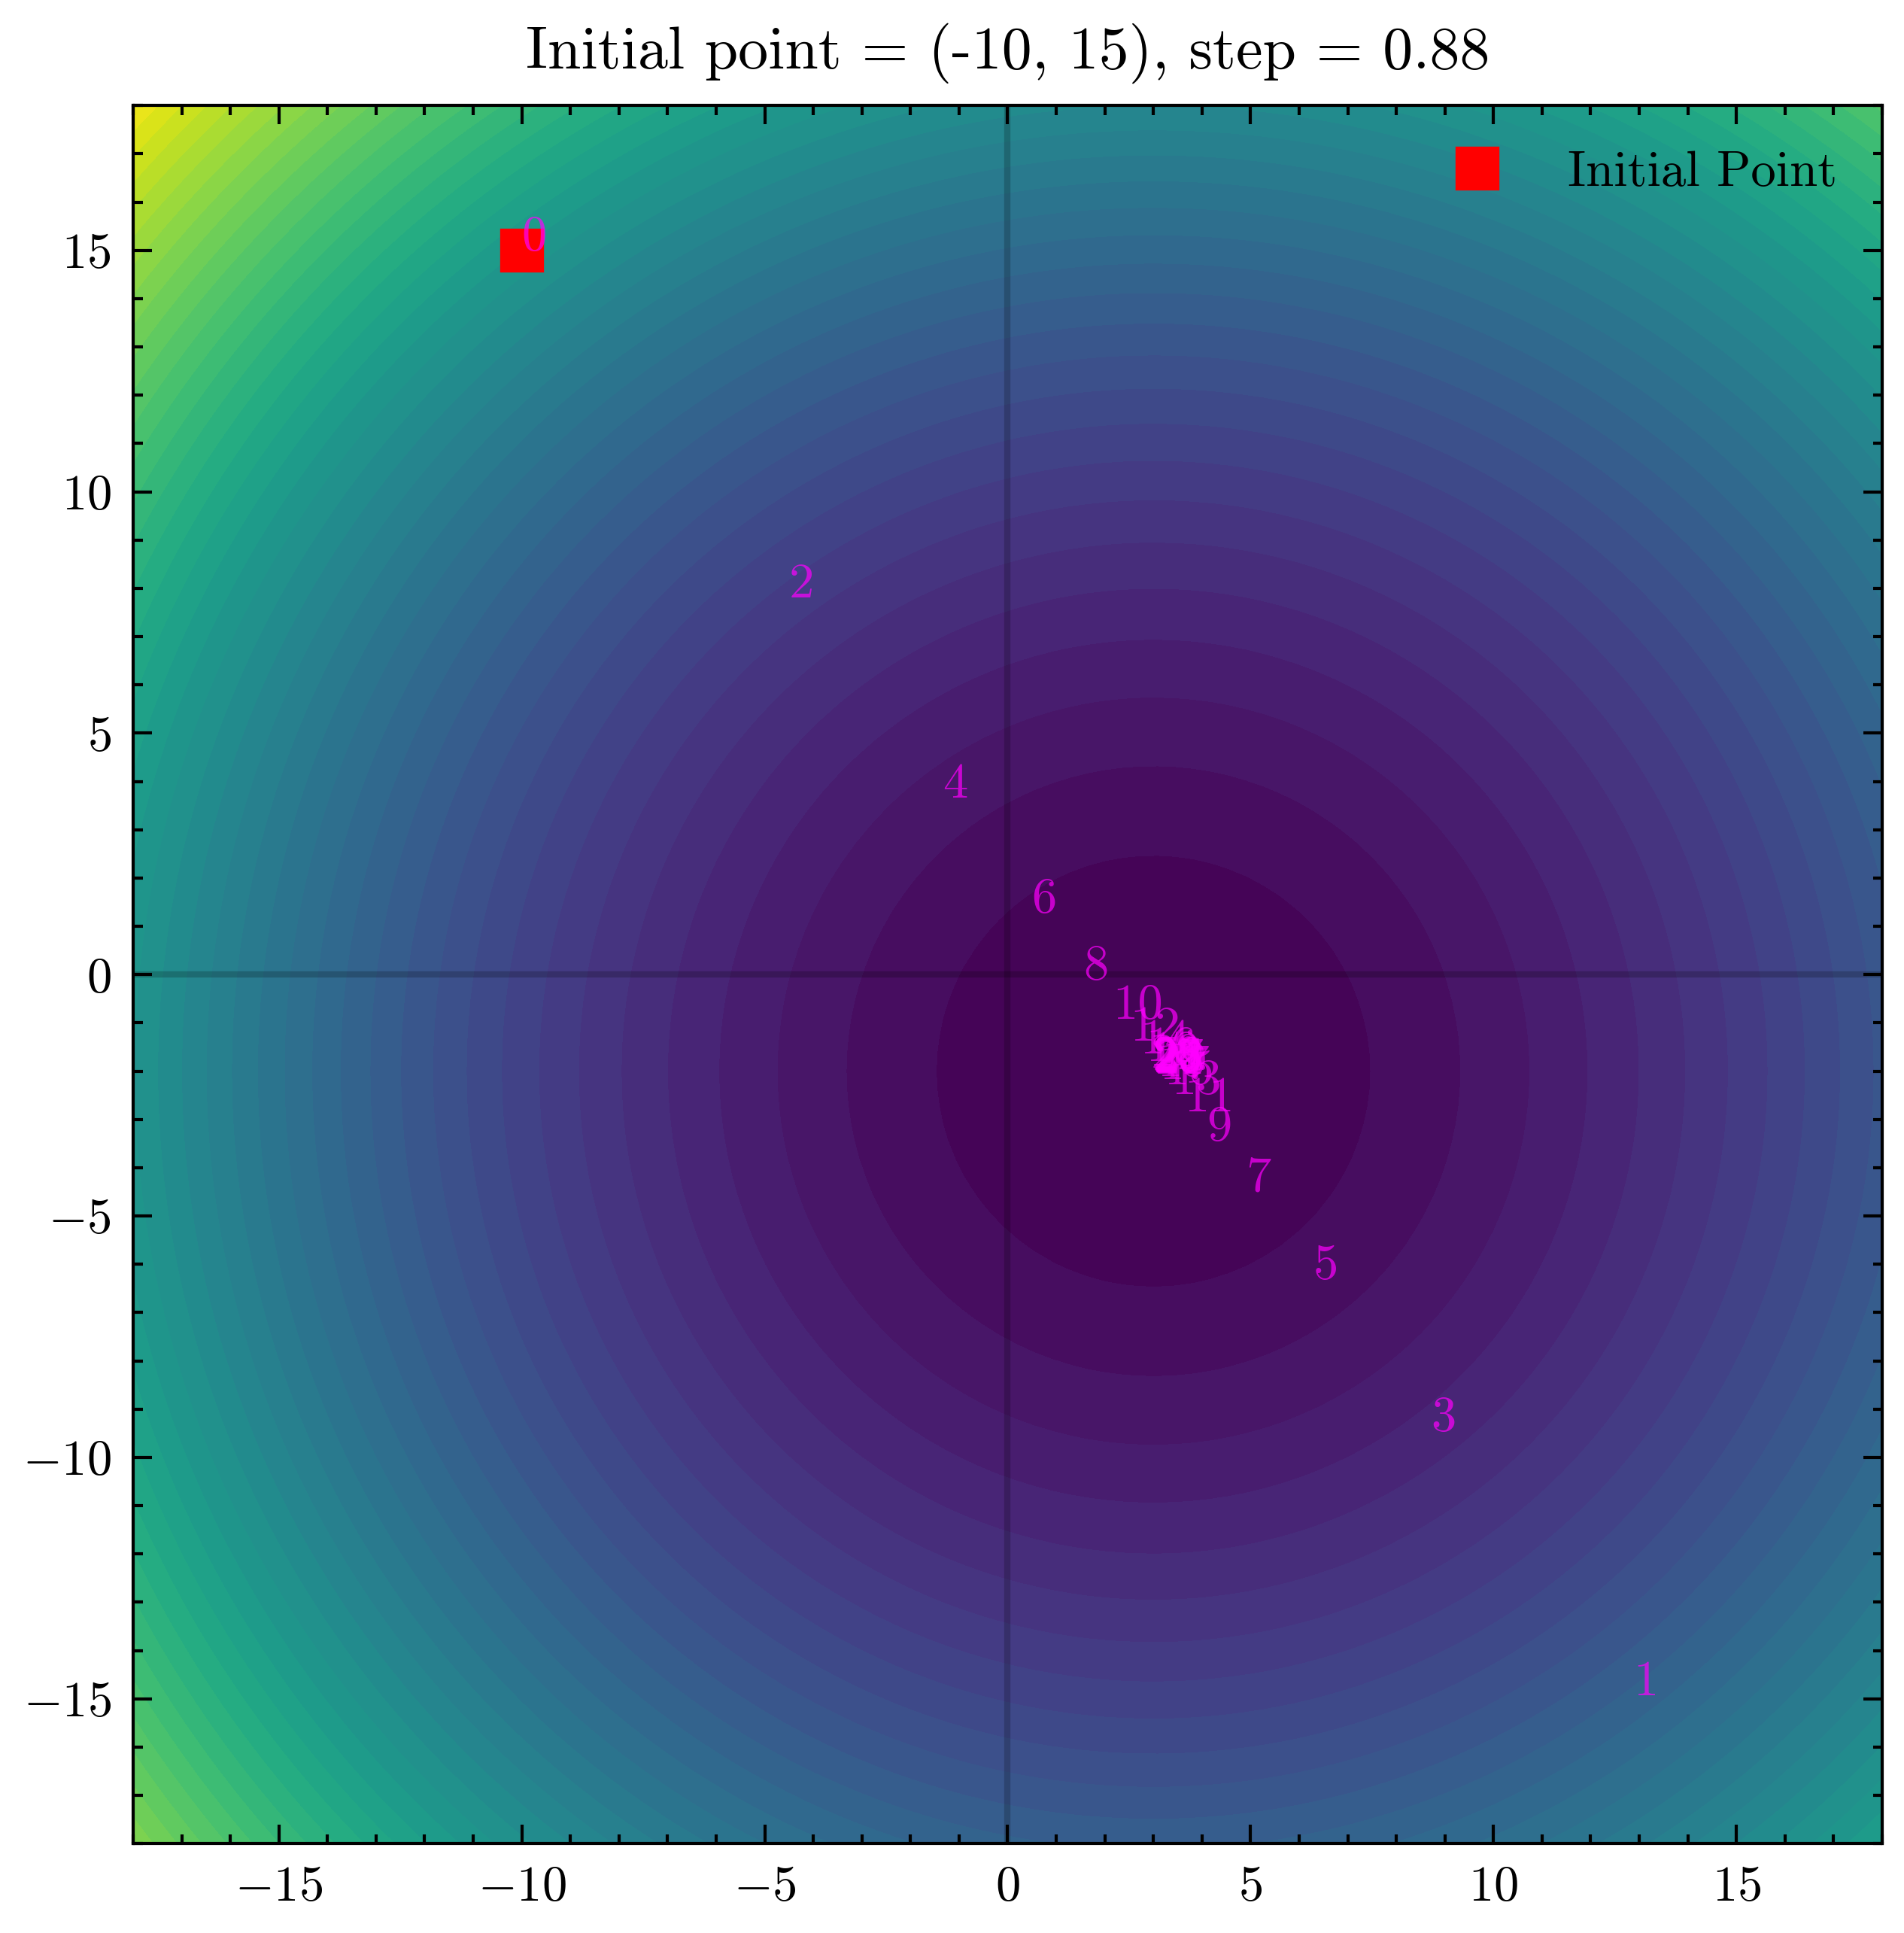

In [22]:
plt.figure(figsize=(5, 5))
plt.contourf(x, y, z, levels=50, cmap='viridis')
plt.axvline(0, alpha =0.2)
plt.axhline(0, alpha =(0.2))

step = 0.88
x_now = -10
y_now = 15
plt.plot(x_now, y_now, 's', color='red', label ='Initial Point')
plt.title(f'Initial point = {x_now, y_now}, step = {step}')

x_next_step_list = [x_now]
y_next_step_list= [y_now]
iteration = 30
for i in range(iteration):
    x_next_step = x_now - step*f_multi_prime(x_now, y_now)[0]
    y_next_step = y_now - step*f_multi_prime(x_now, y_now)[1]
    x_next_step_list.append(x_next_step)
    y_next_step_list.append(y_next_step)

    x_now = x_next_step
    y_now = y_next_step


for i in range(iteration):
    plt.text(x_next_step_list[i], y_next_step_list[i], str(i), color='magenta' , alpha =0.7)

plt.legend()
plt.show()

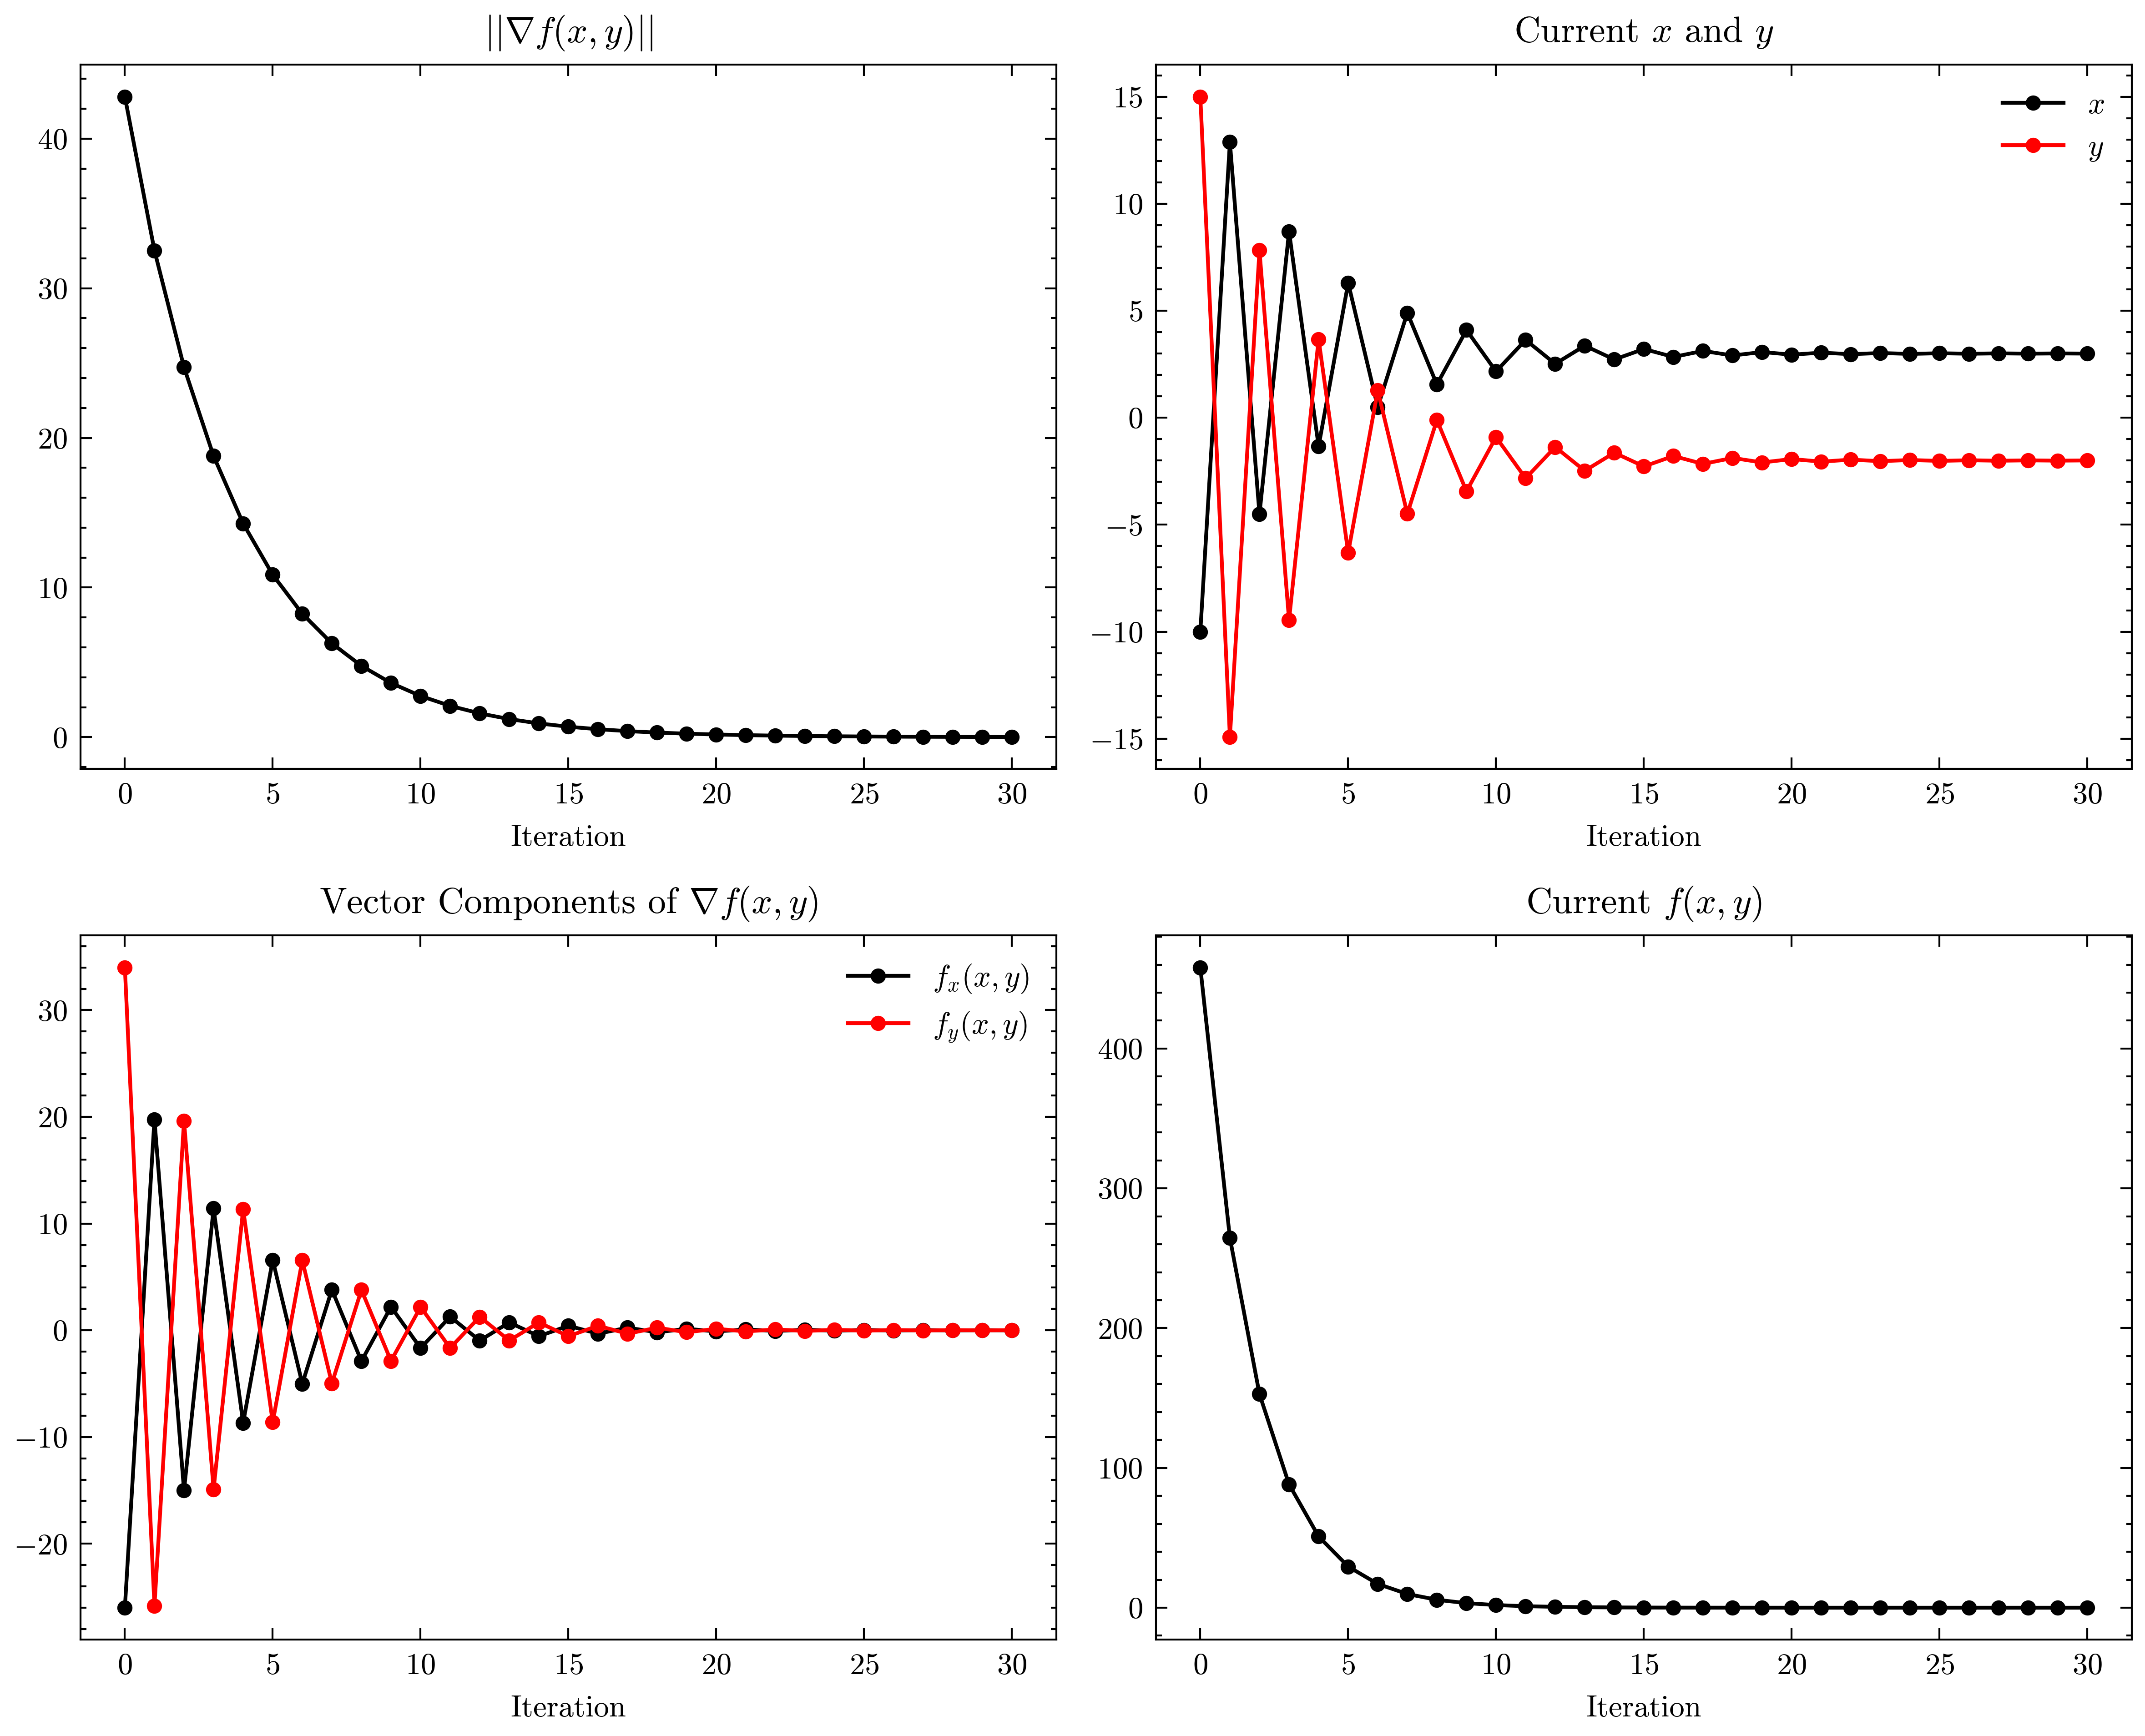

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6.5))
axs[0, 0].plot(np.sqrt(np.sum(f_multi_prime(np.array(x_next_step_list), np.array(y_next_step_list))**2, axis=0)), '.-')
axs[0, 0].set_title(r'$||\nabla f(x,y)||$')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[0, 0].xaxis.set_minor_locator(mticker.NullLocator())

axs[0, 1].plot(x_next_step_list, '.-',  label = '$x$')
axs[0, 1].plot(y_next_step_list, '.-', label = '$y$')
axs[0, 1].set_title('Current $x$ and $y$')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].legend()
axs[0, 1].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[0, 1].xaxis.set_minor_locator(mticker.NullLocator())

axs[1, 0].plot(f_multi_prime(np.array(x_next_step_list), np.array(y_next_step_list))[0], '.-', label='$f_x(x,y)$')
axs[1, 0].plot(f_multi_prime(np.array(x_next_step_list), np.array(y_next_step_list))[1], '.-', label='$f_y(x,y)$')
axs[1, 0].set_title('Vector Components of $\\nabla f(x,y)$')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].legend()
axs[1, 0].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[1, 0].xaxis.set_minor_locator(mticker.NullLocator())

axs[1, 1].plot(f_multi(np.array(x_next_step_list), np.array(y_next_step_list)), '.-')
axs[1, 1].set_title('Current $f(x,y)$')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].xaxis.set_major_locator(mticker.MaxNLocator(n_x_ticks))
axs[1, 1].xaxis.set_minor_locator(mticker.NullLocator())

plt.tight_layout()
plt.show()